In [226]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
import seaborn as sns
from prettytable import PrettyTable
from scipy.stats import multivariate_normal
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from joblib import dump
from joblib import load
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from sklearn.metrics import log_loss, roc_auc_score
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
import seaborn as sns
from prettytable import PrettyTable
from scipy.stats import multivariate_normal
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from joblib import dump
from joblib import load
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from sklearn.metrics import log_loss, roc_auc_score
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec  # Import gridspec module
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Model
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [227]:
df = pd.read_csv("/kaggle/input/plc-network-process3/plcdata.csv", encoding='ISO-8859-1')
df.head()

,PLC Current cycle time,PLC The shortest cycle time,PLC The longest cycle time,PLC Min runtime,PLC Max runtime,PLC Running Status,Current_time,Pump Speed,SG lEVEL,Year,Month,Day,Hour,Minute,Second,Millisecond,label
0,1083967,1001561,0,0,2063000,True,30:20.6,100.0,14.401727,2024,1,23,1,30,20,618,Normal
1,1010590,1001561,0,0,2063000,True,30:20.6,100.0,14.401727,2024,1,23,1,30,20,625,Normal
2,1140260,1001561,0,0,2063000,True,30:20.6,100.0,14.401727,2024,1,23,1,30,20,632,Normal
3,1010764,1001561,0,0,2063000,True,30:20.6,100.0,14.401727,2024,1,23,1,30,20,637,Normal
4,1012729,1001561,0,0,2063000,True,30:20.6,100.0,14.401727,2024,1,23,1,30,20,644,Normal


In [228]:
numeric_columns = ['CycleTimeDifference','Pump Speed',
       'PLC Running Status','MaxRuntimeRatio','cycle_maxrun']
def preprocessing(df, numeric_columns):
    # Create a new column 'CycleTimeDifference' to store the differences in 'PLC Current cycle time'
    df['CycleTimeDifference'] = df['PLC Current cycle time'].diff()
    # Create a new column 'MaxRuntimeRatio' by dividing 'PLC Max runtime' by 'PLC Current cycle time'
    df['MaxRuntimeRatio'] = df['PLC Max runtime'] / df['PLC Current cycle time']

    df['longestimetimeRatio'] = df['PLC The longest cycle time'] / df['PLC Current cycle time']
      
    #df["sd_runtime_ratio"] = np.std(df["MaxRuntimeRatio"])

    # Ratio between Pump Speed and lEVEL
    #df["level_ratio"] = df["PLC Current cycle time"] / df["SG lEVEL"]

    # Ensure positive values for 'CycleTimeDifference' and 'MaxRuntimeRatio'
    df['CycleTimeDifference'] = df['CycleTimeDifference'].fillna(0).abs()  # Fill NaN (first row) with 0 and take absolute value
    df['MaxRuntimeRatio'] = df['MaxRuntimeRatio'].abs()  # Take absolute value for 'MaxRuntimeRatio'
    df['longestimetimeRatio'] = df['longestimetimeRatio'].abs()
    
    df['cycle_maxrun'] = df['CycleTimeDifference'] / df['MaxRuntimeRatio']
    
    
    # Replace NaN values with 0
    df.fillna(0, inplace=True)
    # Initialize LabelEncoder
    label_encoder = LabelEncoder()

    # Fit and transform the 'PLC Running Status' column
    df['PLC Running Status'] = label_encoder.fit_transform(df['PLC Running Status'])
    df['PLC Running Status'] = 1 - df['PLC Running Status']
    # Copy of dataframe
    data = df.copy()
    # Apply label encoding
    #data['PLC Running Status'] = data['PLC Running Status'].apply(lambda x: 0 if x == 8 else 1)
    # Convert labels to numeric form using label encoding
    #label_encoder = LabelEncoder()
    # Fit and transform the 'Label' column
    
    #data['label'] = label_encoder.fit_transform(data['label'])

    # Invert the labels
    #data['label'] = 1 - data['label']
    #y = data['label']
     # Drop non-numeric columns and convert IP columns to numerical form (using dummy variables)
    data = data[numeric_columns]
    dataframe = data.copy()
    
    # Convert the list to a NumPy array
    #labels = np.array(y)
    # Get values from dataset
    raw_data = data.values
    # Get values not last column which is target column
    data = raw_data[:, :-1]
    # Normalization of data
    data = ((data - data.min()) / (data.max() - data.min())) * 2
    return dataframe, data
#output of the function (dataframe)
dataframe,data = preprocessing(df,numeric_columns)
dataframe

,CycleTimeDifference,Pump Speed,PLC Running Status,MaxRuntimeRatio,cycle_maxrun
0,0.0,100.0,0,1.903194,0.000000
1,73377.0,100.0,0,2.041382,35944.770931
2,129670.0,100.0,0,1.809236,71671.116917
3,129496.0,100.0,0,2.041030,63446.386303
4,1965.0,100.0,0,2.037070,964.620691
...,...,...,...,...,...
24996,1358.0,100.0,0,2.039789,665.755057
24997,23480.0,100.0,0,1.993508,11778.230402
24998,60144.0,100.0,0,1.884013,31923.344853
24999,200081.0,100.0,0,1.592947,125604.314980


In [229]:
# Load your models
rf_model = load('/kaggle/input/plc-model-13/random_forest_model.joblib')
svm_model = load('/kaggle/input/plc-model-13/svm_model.joblib')
gb_model = load('/kaggle/input/plc-model-13/gradient_boosting_model.joblib')
lr_model = load('/kaggle/input/plc-model-13/logistic_regression_model.joblib')
xgboost_model = load('/kaggle/input/plc-model-13/xgboost_model.joblib')

In [230]:
#storing data in X_new 
X_new = data

In [231]:
#testing new data
# Assuming X_new is your new dataset
rf_predictions = rf_model.predict(X_new)
svm_predictions = svm_model.predict(X_new)
gb_predictions = gb_model.predict(X_new)
lr_predictions = lr_model.predict(X_new)
xgboost_predictions = xgboost_model.predict(X_new)

In [232]:
# Load your Keras model
nn_model = tf.keras.models.load_model('/kaggle/input/plc-model-13/neural_network_model.h5')
# Assuming X_new is your new dataset
nn_predictions = nn_model.predict(X_new)

782/782 [==============================] - 1s 1ms/step


In [233]:
# Create a DataFrame for predictions

predictions_df = pd.DataFrame({
    'RF_Predictions': rf_predictions,
    'SVM_Predictions': svm_predictions,
    'GB_Predictions': gb_predictions,
    'LR_Predictions': lr_predictions,
    'XGboost_Predictions': xgboost_predictions,
})

# Concatenate the predictions DataFrame with your new dataset
result_df = pd.concat([df, predictions_df], axis=1)
result_df

,PLC Current cycle time,PLC The shortest cycle time,PLC The longest cycle time,PLC Min runtime,PLC Max runtime,PLC Running Status,Current_time,Pump Speed,SG lEVEL,Year,...,label,CycleTimeDifference,MaxRuntimeRatio,longestimetimeRatio,cycle_maxrun,RF_Predictions,SVM_Predictions,GB_Predictions,LR_Predictions,XGboost_Predictions
0,1083967,1001561,0,0,2063000,0,30:20.6,100.0,14.401727,2024,...,Normal,0.0,1.903194,0.0,0.000000,1,1,0,1,0
1,1010590,1001561,0,0,2063000,0,30:20.6,100.0,14.401727,2024,...,Normal,73377.0,2.041382,0.0,35944.770931,1,0,1,0,0
2,1140260,1001561,0,0,2063000,0,30:20.6,100.0,14.401727,2024,...,Normal,129670.0,1.809236,0.0,71671.116917,1,0,1,0,0
3,1010764,1001561,0,0,2063000,0,30:20.6,100.0,14.401727,2024,...,Normal,129496.0,2.041030,0.0,63446.386303,1,0,1,0,0
4,1012729,1001561,0,0,2063000,0,30:20.6,100.0,14.401727,2024,...,Normal,1965.0,2.037070,0.0,964.620691,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24996,1011379,1001561,0,0,2063000,0,33:09.9,100.0,14.917527,2024,...,Normal,1358.0,2.039789,0.0,665.755057,1,1,1,1,0
24997,1034859,1001561,0,0,2063000,0,33:09.9,100.0,14.917527,2024,...,Normal,23480.0,1.993508,0.0,11778.230402,1,1,1,1,0
24998,1095003,1001561,0,0,2063000,0,33:09.9,100.0,14.917527,2024,...,Normal,60144.0,1.884013,0.0,31923.344853,1,0,1,1,0
24999,1295084,1001561,0,0,2063000,0,33:09.9,100.0,14.917527,2024,...,Normal,200081.0,1.592947,0.0,125604.314980,1,0,1,0,0


In [234]:
# Assuming nn_predictions contains the continuous probabilities from your neural network model
threshold = 0.5
binary_predictions = (nn_predictions > threshold).astype(int)

# Convert predictions to DataFrame
nn_binary_predictions_df = pd.DataFrame(binary_predictions, columns=['NN_Binary_Predictions'])
# Concatenate the binary predictions DataFrame with your new dataset
result_df = pd.concat([result_df, nn_binary_predictions_df], axis=1)
result_df.head()

,PLC Current cycle time,PLC The shortest cycle time,PLC The longest cycle time,PLC Min runtime,PLC Max runtime,PLC Running Status,Current_time,Pump Speed,SG lEVEL,Year,...,CycleTimeDifference,MaxRuntimeRatio,longestimetimeRatio,cycle_maxrun,RF_Predictions,SVM_Predictions,GB_Predictions,LR_Predictions,XGboost_Predictions,NN_Binary_Predictions
0,1083967,1001561,0,0,2063000,0,30:20.6,100.0,14.401727,2024,...,0.0,1.903194,0.0,0.000000,1,1,0,1,0,1
1,1010590,1001561,0,0,2063000,0,30:20.6,100.0,14.401727,2024,...,73377.0,2.041382,0.0,35944.770931,1,0,1,0,0,0
2,1140260,1001561,0,0,2063000,0,30:20.6,100.0,14.401727,2024,...,129670.0,1.809236,0.0,71671.116917,1,0,1,0,0,0
3,1010764,1001561,0,0,2063000,0,30:20.6,100.0,14.401727,2024,...,129496.0,2.041030,0.0,63446.386303,1,0,1,0,0,0
4,1012729,1001561,0,0,2063000,0,30:20.6,100.0,14.401727,2024,...,1965.0,2.037070,0.0,964.620691,0,1,1,1,0,0


In [235]:
output_df = result_df
plc_output_df = result_df
plc_output_df.to_csv('plc_output2_model8.csv', index=False)  # Save to a CSV file without including the index

In [236]:
# Assuming you have a DataFrame named 'output_df' containing the predictions
# Columns: 'RF_Predictions', 'SVM_Predictions', 'GB_Predictions', 'LR_Predictions', 'NN_Binary_Predictions'

# Count occurrences of 1 and 0 in each model's predictions
rf_counts = output_df['RF_Predictions'].value_counts()
svm_counts = output_df['SVM_Predictions'].value_counts()
gb_counts = output_df['GB_Predictions'].value_counts()
lr_counts = output_df['LR_Predictions'].value_counts()
XGboost_counts = output_df['XGboost_Predictions'].value_counts()
nn_counts = output_df['NN_Binary_Predictions'].value_counts()

# Print the counts
print("Random Forest Predictions:")
print(rf_counts)

print("\nSVM Predictions:")
print(svm_counts)

print("\nGradient Boosting Predictions:")
print(gb_counts)

print("\nLogistic Regression Predictions:")
print(lr_counts)

print("\nXGboost Predictions:")
print(XGboost_counts)

print("\nNeural Network Binary Predictions:")
print(nn_counts)


Random Forest Predictions:
RF_Predictions
1    18951
0     6050
Name: count, dtype: int64

SVM Predictions:
SVM_Predictions
1    17695
0     7306
Name: count, dtype: int64

Gradient Boosting Predictions:
GB_Predictions
1    14615
0    10386
Name: count, dtype: int64

Logistic Regression Predictions:
LR_Predictions
1    20714
0     4287
Name: count, dtype: int64

XGboost Predictions:
XGboost_Predictions
0    14029
1    10972
Name: count, dtype: int64

Neural Network Binary Predictions:
NN_Binary_Predictions
0    13768
1    11233
Name: count, dtype: int64


In [237]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Assuming you have a DataFrame named 'output_df' with columns:
# 'RF_Predictions', 'SVM_Predictions', 'GB_Predictions', 'LR_Predictions', 'XGboost_Predictions', 'NN_Binary_Predictions', 'Actual_Labels'

# Define a list of model names
model_names = ['RF_Predictions', 'SVM_Predictions', 'GB_Predictions', 'LR_Predictions', 'XGboost_Predictions', 'NN_Binary_Predictions']

# Loop through each model
for i, model_name in enumerate(model_names):
    # Get the predictions and actual labels for the current model
    predictions_col = f'{model_name}'
    actual_labels = output_df['label']
    predictions = output_df[predictions_col]

    # Convert predicted labels to strings
    predictions = predictions.map({0: 'Normal', 1: 'Abnormal'})

    # Create a confusion matrix
    confusion_mat = confusion_matrix(actual_labels, predictions)

    # Print confusion matrix
    print(f"\nConfusion Matrix for {model_name}:")
    print(pd.DataFrame(confusion_mat, index=['Actual Normal', 'Actual Abnormal'], columns=['Predicted Normal', 'Predicted Abnormal']))

    # Generate and print classification report
    classification_rep = classification_report(actual_labels, predictions)
    print(f"\nClassification Report for {model_name}:")
    print(classification_rep)



Confusion Matrix for RF_Predictions:
                 Predicted Normal  Predicted Abnormal
Actual Normal                9487                1485
Actual Abnormal              9464                4565

Classification Report for RF_Predictions:
              precision    recall  f1-score   support

    Abnormal       0.50      0.86      0.63     10972
      Normal       0.75      0.33      0.45     14029

    accuracy                           0.56     25001
   macro avg       0.63      0.60      0.54     25001
weighted avg       0.64      0.56      0.53     25001


Confusion Matrix for SVM_Predictions:
                 Predicted Normal  Predicted Abnormal
Actual Normal               10618                 354
Actual Abnormal              7077                6952

Classification Report for SVM_Predictions:
              precision    recall  f1-score   support

    Abnormal       0.60      0.97      0.74     10972
      Normal       0.95      0.50      0.65     14029

    accuracy         

In [238]:
df = pd.read_csv("/kaggle/input/plc-network-process3/networktrafficdata.csv", encoding='ISO-8859-1')
df

,No.,Time,Source,Destination,Protocol,Length,Time since previous frame in this TCP stream,Source Port,Destination Port,Sequence Number,Acknowledgment Number,Time to Live,Arrival Time,S7 Communication,Data length,Function,Length.1,Byte Address,Info,label
0,1,0.000000,192.168.1.241,192.168.1.1,COTP,61,0.000000,63749.0,102.0,1.0,1.0,128.0,"Jan 23, 2024 01:30:13.030495000 China Standard...",NaN,NaN,NaN,NaN,NaN,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal
1,2,0.132074,192.168.0.2,192.168.0.1,COTP,145,0.000000,60414.0,102.0,1.0,1.0,128.0,"Jan 23, 2024 01:30:13.162569000 China Standard...",NaN,NaN,NaN,NaN,NaN,DT TPDU (0) EOT,Normal
2,3,0.132577,192.168.0.2,192.168.0.1,COTP,61,0.000503,60414.0,102.0,92.0,56.0,128.0,"Jan 23, 2024 01:30:13.163072000 China Standard...",NaN,NaN,NaN,NaN,NaN,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal
3,4,0.132814,192.168.0.2,192.168.0.1,COTP,61,0.000237,60414.0,102.0,99.0,322.0,128.0,"Jan 23, 2024 01:30:13.163309000 China Standard...",NaN,NaN,NaN,NaN,NaN,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal
4,5,0.200259,192.168.0.2,224.0.0.22,IGMPv3,54,NaN,NaN,NaN,NaN,NaN,1.0,"Jan 23, 2024 01:30:13.230754000 China Standard...",NaN,NaN,NaN,NaN,NaN,Membership Report / Leave group 224.0.0.252,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3971,3972,177.399361,192.168.0.2,192.168.0.1,COTP,61,0.000495,60414.0,102.0,59851.0,183631.0,128.0,"Jan 23, 2024 01:33:10.429856000 China Standard...",NaN,NaN,NaN,NaN,NaN,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal
3972,3973,177.399480,192.168.0.2,192.168.0.1,TCP,54,0.000119,60414.0,102.0,59858.0,183897.0,128.0,"Jan 23, 2024 01:33:10.429975000 China Standard...",NaN,NaN,NaN,NaN,NaN,60414 > 102 [ACK] Seq=59858 Ack=183897 Win=6...,Normal
3973,3974,177.399551,192.168.0.2,192.168.0.1,COTP,61,0.000071,60414.0,102.0,59858.0,183897.0,128.0,"Jan 23, 2024 01:33:10.430046000 China Standard...",NaN,NaN,NaN,NaN,NaN,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal
3974,3975,177.530750,192.168.0.2,192.168.0.1,COTP,61,0.610354,60413.0,102.0,1788.0,23704.0,128.0,"Jan 23, 2024 01:33:10.561245000 China Standard...",NaN,NaN,NaN,NaN,NaN,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal


In [239]:
# Assuming you have a DataFrame called df
missing_values = df.isna()  # or df.isnull()

# Count the number of missing values in each column
missing_count = missing_values.sum()

# Display the count of missing values per column
print(missing_count)

# Replace NaN values with 0
df.fillna(0, inplace=True)

No.                                                0
Time                                               0
Source                                             0
Destination                                        0
Protocol                                           0
Length                                             0
Time since previous frame in this TCP stream     781
Source Port                                      781
Destination Port                                 781
Sequence Number                                  781
Acknowledgment Number                            781
Time to Live                                     233
Arrival Time                                       0
S7 Communication                                3689
Data length                                     3689
Function                                        3689
Length.1                                        3871
Byte Address                                    3690
Info                                          

In [240]:
# Drop non-numeric columns and convert IP columns to numerical form (using dummy variables)
numeric_columns = ['Source', 'Destination', 'Protocol', 'Length',
       'Source Port',
       'Destination Port', 
       'Time to Live', 'Byte Address']


def preprocessing(df,numeric_columns):
    #copy of dataframe
    data = df.copy()
    # Replace NaN values with 0
    data.fillna(0, inplace=True)
    '''
      # Replace 0 values in 'Function' column with 'Unknown'
    data['Function'] = data['Function'].replace(0, 'Unknown')

    # Label encoding for specific string columns
    label_encoder = LabelEncoder()

    # Only encode string values while keeping 0s intact
    mask = data['Function'].apply(lambda x: isinstance(x, str))
    data.loc[mask, 'Function'] = label_encoder.fit_transform(data.loc[mask, 'Function'])
    data['Function'] = data['Function'].astype(int)
     '''
    # Convert labels to numeric form using label encoding
    label_encoder = LabelEncoder()
    
    data['Source'] = data['Source'].apply(lambda x: 0 if x in ['192.168.0.1', '192.168.0.2'] else 1)
    data['Destination'] = data['Destination'].apply(lambda x: 0 if x in ['192.168.0.1', '192.168.0.2'] else 1)
    
    data['Byte Address'] = data['Byte Address'].apply(lambda x: 0 if x in [int('0')] else 1)
   
    # Assuming 'data' is your DataFrame and 'Protocol' column needs encoding
    data['Protocol'] = data['Protocol'].fillna('Unknown')  # Fill NaN values with 'Unknown'

    known_protocols = ['ARP', 'BROWSER', 'COTP', 'ICMPv6', 'IGMPv3', 'IPv4', 'LLDP', 'LLMNR',
                       'MDNS', 'NBNS', 'NTP', 'OpcUa', 'S7COMM', 'SSDP', 'TCP','TPKT','ICMP']

    # Create a label encoder
    label_encoder = LabelEncoder()

    # Fit and transform the 'Protocol' column
    data['Protocol'] = label_encoder.fit_transform(data['Protocol'])

    # Handling unknown protocols
    if 'Unknown' not in label_encoder.classes_:
        # Assign a unique value for 'Unknown' protocol
        unknown_label = max(data['Protocol']) + 1
        print(f"Assigning 'Unknown' protocol label as: {unknown_label}")
        data.loc[data['Protocol'] == 'Unknown', 'Protocol'] = unknown_label

    # Define a function to encode protocols or assign a default value for unknown ones
    def encode_protocol(protocol):
        if protocol in known_protocols:
            return label_encoder.transform([protocol])[0]
        else:
            return unknown_label  # Assign the value you previously determined for unknown protocols

    # Apply the encode_protocol function to the 'Protocol' column
    data['Protocol'] = data['Protocol'].apply(encode_protocol)

    
    # Fit and transform the 'Label' column
    #data['Label'] = label_encoder.fit_transform(data['Label'])

    # Invert the labels
    #data['Label'] = 1 - data['Label']
    #y = data['Label']
    # Drop non-numeric columns and convert IP columns to numerical form (using dummy variables)
    data= data[numeric_columns]
    dataframe = data.copy()
    # Convert the list to a NumPy array
    #labels = np.array(y)
    #get values from dataset
    raw_data = data.values
    # Get values not last column which is target column
    data = raw_data[:, 0:-1]
    #normalization of data
    data = ((data - data.min()) / (data.max() - data.min()))*2
    return dataframe,data
dataframe,data = preprocessing(df,numeric_columns)

Assigning 'Unknown' protocol label as: 12


In [241]:
# Load your models
rf_model = load('/kaggle/input/network-model-15/random_forest_model.joblib')
svm_model = load('/kaggle/input/network-model-15/svm_model.joblib')
gb_model = load('/kaggle/input/network-model-15/gradient_boosting_model.joblib')
lr_model = load('/kaggle/input/network-model-15/logistic_regression_model.joblib')
xgboost_model = load('/kaggle/input/network-model-15/xgboost_model.joblib')

In [242]:
#storing data in X_new 
X_new = data

In [243]:
#testing new data
# Assuming X_new is your new dataset
rf_predictions = rf_model.predict(X_new)
svm_predictions = svm_model.predict(X_new)
gb_predictions = gb_model.predict(X_new)
lr_predictions = lr_model.predict(X_new)
xgboost_predictions = xgboost_model.predict(X_new)

In [244]:
# Load your Keras model
nn_model = tf.keras.models.load_model('/kaggle/input/network-model-15/neural_network_model.h5')
# Assuming X_new is your new dataset
nn_predictions = nn_model.predict(X_new)

125/125 [==============================] - 0s 1ms/step


In [245]:
# Create a DataFrame for predictions

predictions_df = pd.DataFrame({
    'RF_Predictions': rf_predictions,
    'SVM_Predictions': svm_predictions,
    'GB_Predictions': gb_predictions,
    'LR_Predictions': lr_predictions,
    'XGboost_Predictions': xgboost_predictions,
})

# Concatenate the predictions DataFrame with your new dataset
result_df = pd.concat([df, predictions_df], axis=1)
result_df

,No.,Time,Source,Destination,Protocol,Length,Time since previous frame in this TCP stream,Source Port,Destination Port,Sequence Number,...,Function,Length.1,Byte Address,Info,label,RF_Predictions,SVM_Predictions,GB_Predictions,LR_Predictions,XGboost_Predictions
0,1,0.000000,192.168.1.241,192.168.1.1,COTP,61,0.000000,63749.0,102.0,1.0,...,0,0.0,0.0,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal,0,0,0,0,0
1,2,0.132074,192.168.0.2,192.168.0.1,COTP,145,0.000000,60414.0,102.0,1.0,...,0,0.0,0.0,DT TPDU (0) EOT,Normal,0,0,0,0,0
2,3,0.132577,192.168.0.2,192.168.0.1,COTP,61,0.000503,60414.0,102.0,92.0,...,0,0.0,0.0,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal,0,0,0,0,0
3,4,0.132814,192.168.0.2,192.168.0.1,COTP,61,0.000237,60414.0,102.0,99.0,...,0,0.0,0.0,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal,0,0,0,0,0
4,5,0.200259,192.168.0.2,224.0.0.22,IGMPv3,54,0.000000,0.0,0.0,0.0,...,0,0.0,0.0,Membership Report / Leave group 224.0.0.252,Normal,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3971,3972,177.399361,192.168.0.2,192.168.0.1,COTP,61,0.000495,60414.0,102.0,59851.0,...,0,0.0,0.0,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal,0,0,0,0,0
3972,3973,177.399480,192.168.0.2,192.168.0.1,TCP,54,0.000119,60414.0,102.0,59858.0,...,0,0.0,0.0,60414 > 102 [ACK] Seq=59858 Ack=183897 Win=6...,Normal,0,0,0,0,0
3973,3974,177.399551,192.168.0.2,192.168.0.1,COTP,61,0.000071,60414.0,102.0,59858.0,...,0,0.0,0.0,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal,0,0,0,0,0
3974,3975,177.530750,192.168.0.2,192.168.0.1,COTP,61,0.610354,60413.0,102.0,1788.0,...,0,0.0,0.0,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal,0,0,0,0,0


In [246]:
# Assuming nn_predictions contains the continuous probabilities from your neural network model
threshold = 0.5
binary_predictions = (nn_predictions > threshold).astype(int)

# Convert predictions to DataFrame
nn_binary_predictions_df = pd.DataFrame(binary_predictions, columns=['NN_Binary_Predictions'])
# Concatenate the binary predictions DataFrame with your new dataset
result_df = pd.concat([result_df, nn_binary_predictions_df], axis=1)
result_df.head()

,No.,Time,Source,Destination,Protocol,Length,Time since previous frame in this TCP stream,Source Port,Destination Port,Sequence Number,...,Length.1,Byte Address,Info,label,RF_Predictions,SVM_Predictions,GB_Predictions,LR_Predictions,XGboost_Predictions,NN_Binary_Predictions
0,1,0.000000,192.168.1.241,192.168.1.1,COTP,61,0.000000,63749.0,102.0,1.0,...,0.0,0.0,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal,0,0,0,0,0,0
1,2,0.132074,192.168.0.2,192.168.0.1,COTP,145,0.000000,60414.0,102.0,1.0,...,0.0,0.0,DT TPDU (0) EOT,Normal,0,0,0,0,0,0
2,3,0.132577,192.168.0.2,192.168.0.1,COTP,61,0.000503,60414.0,102.0,92.0,...,0.0,0.0,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal,0,0,0,0,0,0
3,4,0.132814,192.168.0.2,192.168.0.1,COTP,61,0.000237,60414.0,102.0,99.0,...,0.0,0.0,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal,0,0,0,0,0,0
4,5,0.200259,192.168.0.2,224.0.0.22,IGMPv3,54,0.000000,0.0,0.0,0.0,...,0.0,0.0,Membership Report / Leave group 224.0.0.252,Normal,0,1,0,1,0,1


In [247]:
output_df = result_df
network_output_df = result_df
network_output_df.to_csv('network_output2_model8.csv', index=False)  # Save to a CSV file without including the index

In [248]:
# Assuming you have a DataFrame named 'output_df' containing the predictions
# Columns: 'RF_Predictions', 'SVM_Predictions', 'GB_Predictions', 'LR_Predictions', 'NN_Binary_Predictions'

# Count occurrences of 1 and 0 in each model's predictions
rf_counts = output_df['RF_Predictions'].value_counts()
svm_counts = output_df['SVM_Predictions'].value_counts()
gb_counts = output_df['GB_Predictions'].value_counts()
lr_counts = output_df['LR_Predictions'].value_counts()
XGboost_counts = output_df['XGboost_Predictions'].value_counts()
nn_counts = output_df['NN_Binary_Predictions'].value_counts()

# Print the counts
print("Random Forest Predictions:")
print(rf_counts)

print("\nSVM Predictions:")
print(svm_counts)

print("\nGradient Boosting Predictions:")
print(gb_counts)

print("\nLogistic Regression Predictions:")
print(lr_counts)

print("\nXGboost Predictions:")
print(XGboost_counts)

print("\nNeural Network Binary Predictions:")
print(nn_counts)


Random Forest Predictions:
RF_Predictions
0    2535
1    1441
Name: count, dtype: int64

SVM Predictions:
SVM_Predictions
0    2341
1    1635
Name: count, dtype: int64

Gradient Boosting Predictions:
GB_Predictions
0    2535
1    1441
Name: count, dtype: int64

Logistic Regression Predictions:
LR_Predictions
0    2347
1    1629
Name: count, dtype: int64

XGboost Predictions:
XGboost_Predictions
0    3976
Name: count, dtype: int64

Neural Network Binary Predictions:
NN_Binary_Predictions
0    2341
1    1635
Name: count, dtype: int64


In [249]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Assuming you have a DataFrame named 'output_df' with columns:
# 'RF_Predictions', 'SVM_Predictions', 'GB_Predictions', 'LR_Predictions', 'XGboost_Predictions', 'NN_Binary_Predictions', 'Actual_Labels'

# Define a list of model names
model_names = ['RF_Predictions', 'SVM_Predictions', 'GB_Predictions', 'LR_Predictions', 'XGboost_Predictions', 'NN_Binary_Predictions']

# Loop through each model
for i, model_name in enumerate(model_names):
    # Get the predictions and actual labels for the current model
    predictions_col = f'{model_name}'
    actual_labels = output_df['label']
    predictions = output_df[predictions_col]

    # Convert predicted labels to strings
    predictions = predictions.map({0: 'Normal', 1: 'Abnormal'})

    # Create a confusion matrix
    confusion_mat = confusion_matrix(actual_labels, predictions)

    # Print confusion matrix
    print(f"\nConfusion Matrix for {model_name}:")
    print(pd.DataFrame(confusion_mat, index=['Actual Normal', 'Actual Abnormal'], columns=['Predicted Normal', 'Predicted Abnormal']))

    # Generate and print classification report
    classification_rep = classification_report(actual_labels, predictions)
    print(f"\nClassification Report for {model_name}:")
    print(classification_rep)



Confusion Matrix for RF_Predictions:
                 Predicted Normal  Predicted Abnormal
Actual Normal                1441                   0
Actual Abnormal                 0                2535

Classification Report for RF_Predictions:
              precision    recall  f1-score   support

    Abnormal       1.00      1.00      1.00      1441
      Normal       1.00      1.00      1.00      2535

    accuracy                           1.00      3976
   macro avg       1.00      1.00      1.00      3976
weighted avg       1.00      1.00      1.00      3976


Confusion Matrix for SVM_Predictions:
                 Predicted Normal  Predicted Abnormal
Actual Normal                1430                  11
Actual Abnormal               205                2330

Classification Report for SVM_Predictions:
              precision    recall  f1-score   support

    Abnormal       0.87      0.99      0.93      1441
      Normal       1.00      0.92      0.96      2535

    accuracy         

In [250]:
df2 = pd.read_excel("/kaggle/input/process-normal-data/MATLABNormal2.xlsx")
df2

,time,CD_Level,CD_Press,CD_CondTemp,RXP(%),RCPFlowoutLP1(kg/s),RCPFlowoutLP2(kg/s),RXCTin (K),RXCTout (K),PZp (Pa),...,CC_PumpSpeed,CC_PumpOnOff,CD_Press.1,tout,CTRL_RXPowerSetpoint,time.1,locrem,local_rxpowsetpoint,RPS_En,label
0,0.0,0.999957,5199.600000,306.458247,100.000000,8801.400000,8801.400000,563.830025,590.684675,1.511510e+07,...,12566.370614,1,5199.600000,1.705953e+09,0,0.0,0.0,100.0,0.0,Normal
1,0.1,0.999986,5226.781640,306.547639,99.699746,8892.296116,8892.296116,563.126887,590.643697,1.511517e+07,...,12566.370614,1,5226.781640,1.705953e+09,0,NaN,NaN,NaN,NaN,Normal
2,0.2,1.000006,5245.464677,306.609082,99.917906,8860.585708,8860.584930,562.946021,590.660549,1.511521e+07,...,12568.078487,1,5245.464677,1.705953e+09,0,NaN,NaN,NaN,NaN,Normal
3,0.3,1.000019,5258.238118,306.651090,99.968228,8815.061260,8815.060070,562.842072,590.668777,1.511525e+07,...,12570.891935,1,5258.238118,1.705953e+09,0,NaN,NaN,NaN,NaN,Normal
4,0.4,1.000027,5266.909097,306.679606,99.998678,8830.788720,8830.787012,562.745628,590.672098,1.511526e+07,...,12574.396107,1,5266.909097,1.705953e+09,0,NaN,NaN,NaN,NaN,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71996,7199.6,1.000000,5199.599999,306.458247,100.012339,8801.433203,8801.433197,562.938140,590.615015,1.510600e+07,...,12905.482824,1,5199.599999,1.705960e+09,0,NaN,NaN,NaN,NaN,Normal
71997,7199.7,1.000000,5199.599999,306.458247,100.012339,8801.433200,8801.433194,562.938140,590.615015,1.510600e+07,...,12905.482824,1,5199.599999,1.705960e+09,0,NaN,NaN,NaN,NaN,Normal
71998,7199.8,1.000000,5199.599999,306.458247,100.012339,8801.433197,8801.433190,562.938140,590.615015,1.510600e+07,...,12905.482824,1,5199.599999,1.705960e+09,0,NaN,NaN,NaN,NaN,Normal
71999,7199.9,1.000000,5199.599999,306.458247,100.012339,8801.433194,8801.433187,562.938140,590.615015,1.510600e+07,...,12905.482824,1,5199.599999,1.705960e+09,0,NaN,NaN,NaN,NaN,Normal


In [251]:
# Read Normal Data
df1 = pd.read_excel("/kaggle/input/plc-network-process3/processdata.xlsx")
df1

,time,CD_Level,CD_Press,CD_CondTemp,RXP(%),RCPFlowoutLP1(kg/s),RCPFlowoutLP2(kg/s),RXCTin (K),RXCTout (K),PZp (Pa),...,CC_PumpOnOff,CD_Press.1,tout,currenttime,CTRL_RXPowerSetpoint,time.1,locrem,local_rxpowsetpoint,RPS_En,label
0,0.0,0.999957,5199.600000,306.458247,100.000000,8801.400000,8801.400000,563.830025,590.684675,1.511510e+07,...,1,5199.600000,1.705973e+09,2024-01-23 01:28:20.166,0,0.0,0.0,100.0,0.0,Normal
1,0.1,0.999986,5226.781640,306.547639,99.699746,8892.296116,8892.296116,563.126887,590.643697,1.511517e+07,...,1,5226.781640,1.705973e+09,2024-01-23 01:28:20.379,0,NaN,NaN,NaN,NaN,Normal
2,0.2,1.000006,5245.464677,306.609082,99.917906,8860.585708,8860.584930,562.946021,590.660549,1.511521e+07,...,1,5245.464677,1.705973e+09,2024-01-23 01:28:20.383,0,NaN,NaN,NaN,NaN,Normal
3,0.3,1.000019,5258.238118,306.651090,99.968228,8815.061260,8815.060070,562.842072,590.668777,1.511525e+07,...,1,5258.238118,1.705973e+09,2024-01-23 01:28:20.460,0,NaN,NaN,NaN,NaN,Normal
4,0.4,1.000026,5266.768567,306.679144,99.998678,8830.788720,8830.787012,562.745628,590.672098,1.511526e+07,...,1,5266.768567,1.705973e+09,2024-01-23 01:28:20.559,0,NaN,NaN,NaN,NaN,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,296.8,1.196049,5267.788837,306.682499,99.083574,8821.419184,8821.419190,563.049874,590.414377,1.496248e+07,...,1,5267.788837,1.705974e+09,2024-01-23 01:33:16.979,0,NaN,NaN,NaN,NaN,Normal
2969,296.9,1.195317,5267.806162,306.682556,99.083941,8821.417121,8821.417127,563.049360,590.413871,1.496232e+07,...,1,5267.806162,1.705974e+09,2024-01-23 01:33:17.072,0,NaN,NaN,NaN,NaN,Normal
2970,297.0,1.194587,5267.823578,306.682613,99.084319,8821.417026,8821.417032,563.048869,590.413371,1.496207e+07,...,1,5267.823578,1.705974e+09,2024-01-23 01:33:17.181,0,NaN,NaN,NaN,NaN,Normal
2971,297.1,1.193858,5267.841084,306.682671,99.084696,8821.414911,8821.414917,563.048361,590.412875,1.496192e+07,...,1,5267.841084,1.705974e+09,2024-01-23 01:33:17.272,0,NaN,NaN,NaN,NaN,Normal


In [252]:
from datetime import datetime


# Assuming 'MATLAB Function' column contains POSIX time values in seconds
# Create your DataFrame df1

# Convert 'MATLAB Function' column to datetime
df1['tout'] = pd.to_datetime(df1['tout'], unit='s')

# Extract date components into separate columns
df1['Year'] = df1['tout'].dt.year
df1['Month'] = df1['tout'].dt.month
df1['Day'] = df1['tout'].dt.day
df1['Hour'] = df1['tout'].dt.hour
df1['Minute'] = df1['tout'].dt.minute
df1['Second'] = df1['tout'].dt.second
df1['Millisecond'] = df1['tout'].dt.microsecond // 1000

# Display the resulting DataFrame
df1


,time,CD_Level,CD_Press,CD_CondTemp,RXP(%),RCPFlowoutLP1(kg/s),RCPFlowoutLP2(kg/s),RXCTin (K),RXCTout (K),PZp (Pa),...,local_rxpowsetpoint,RPS_En,label,Year,Month,Day,Hour,Minute,Second,Millisecond
0,0.0,0.999957,5199.600000,306.458247,100.000000,8801.400000,8801.400000,563.830025,590.684675,1.511510e+07,...,100.0,0.0,Normal,2024,1,23,1,28,20,165
1,0.1,0.999986,5226.781640,306.547639,99.699746,8892.296116,8892.296116,563.126887,590.643697,1.511517e+07,...,NaN,NaN,Normal,2024,1,23,1,28,20,378
2,0.2,1.000006,5245.464677,306.609082,99.917906,8860.585708,8860.584930,562.946021,590.660549,1.511521e+07,...,NaN,NaN,Normal,2024,1,23,1,28,20,382
3,0.3,1.000019,5258.238118,306.651090,99.968228,8815.061260,8815.060070,562.842072,590.668777,1.511525e+07,...,NaN,NaN,Normal,2024,1,23,1,28,20,460
4,0.4,1.000026,5266.768567,306.679144,99.998678,8830.788720,8830.787012,562.745628,590.672098,1.511526e+07,...,NaN,NaN,Normal,2024,1,23,1,28,20,559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,296.8,1.196049,5267.788837,306.682499,99.083574,8821.419184,8821.419190,563.049874,590.414377,1.496248e+07,...,NaN,NaN,Normal,2024,1,23,1,33,16,979
2969,296.9,1.195317,5267.806162,306.682556,99.083941,8821.417121,8821.417127,563.049360,590.413871,1.496232e+07,...,NaN,NaN,Normal,2024,1,23,1,33,17,72
2970,297.0,1.194587,5267.823578,306.682613,99.084319,8821.417026,8821.417032,563.048869,590.413371,1.496207e+07,...,NaN,NaN,Normal,2024,1,23,1,33,17,180
2971,297.1,1.193858,5267.841084,306.682671,99.084696,8821.414911,8821.414917,563.048361,590.412875,1.496192e+07,...,NaN,NaN,Normal,2024,1,23,1,33,17,272


In [253]:
column_names =  ['SG1_Press', 'SG1_Level', 'SG1_Level.1', 'FW_Pump1Flow', 'FW_Pump1Speed']
def training_model(df1,column_names):
    df_final = df1[column_names]
        # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df_final)

    # Define sequence length and features
    sequence_length = 10  # Number of time steps in each sequence
    num_features = len(df_final.columns)

    # Create sequences and corresponding labels
    sequences = []
    labels = []
    for i in range(len(scaled_data) - sequence_length):
        seq = scaled_data[i:i+sequence_length]
        label = scaled_data[i+sequence_length][4]  # 'target' column index
        sequences.append(seq)
        labels.append(label)

    # Convert to numpy arrays
    sequences = np.array(sequences)
    labels = np.array(labels)

    # Split into train and test sets
    train_size = int(0.801 * len(sequences))
    train_x, test_x = sequences[:train_size], sequences[train_size:]
    train_y, test_y = labels[:train_size], labels[train_size:]
    print("Train size:",train_size)
    print("Train X shape:", train_x.shape)
    print("Train Y shape:", train_y.shape)
    print("Test X shape:", test_x.shape)
    print("Test Y shape:", test_y.shape)
    print("---------------------------")
    print("---------------------------")
    '''
    # Create the LSTM model
    model = Sequential()

    # Add LSTM layers with dropout
    model.add(LSTM(units=128, input_shape=(train_x.shape[1], train_x.shape[2]), return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(units=64, return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(units=32, return_sequences=False))
    model.add(Dropout(0.2))

    # Add a dense output layer
    model.add(Dense(units=1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.summary()
    # Define callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint('/kaggle/working/best_model_weights.h5', monitor='val_loss', save_best_only=True)

    # Train the model
    history = model.fit(
        train_x, train_y,
        epochs=100,
        batch_size=64,
        validation_split=0.2,  # Use part of the training data as validation
        callbacks=[early_stopping, model_checkpoint])
    '''
    # Evaluate the best model on the test set
    best_model = tf.keras.models.load_model('/kaggle/input/process-model13/best_model_weightsLSTM.h5')
    test_loss = best_model.evaluate(test_x, test_y)
    print("---------------------------")
    print("---------------------------")
    print("Test Loss:", test_loss)
    print("---------------------------")
    print("---------------------------")
    '''
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()
    '''
    
    
    return best_model,train_x,test_x,train_y,test_y,df_final
best_model,train_x,test_x,train_y,test_y,df_final = training_model(df1,column_names)

Train size: 2373
Train X shape: (2373, 10, 5)
Train Y shape: (2373,)
Test X shape: (590, 10, 5)
Test Y shape: (590,)
---------------------------
---------------------------
19/19 [==============================] - 1s 9ms/step - loss: 0.0232
---------------------------
---------------------------
Test Loss: 0.023227062076330185
---------------------------
---------------------------


In [254]:

# Assuming you have trained the model and have the 'best_model' object
# Also, 'test_x' and 'test_y' should be available

# Predict temperatures using the trained model
predictions = best_model.predict(test_x)

# Calculate evaluation metrics
mae = mean_absolute_error(test_y, predictions)
mse = mean_squared_error(test_y, predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)



19/19 [==============================] - 1s 9ms/step
Mean Absolute Error (MAE): 0.0639912839329849
Mean Squared Error (MSE): 0.023227062931956418
Root Mean Squared Error (RMSE): 0.1524042746511935


In [255]:
def prediction_result(test_x,test_y,best_model):
    # Normalize the data
    scaler = MinMaxScaler()
    
    # y_true values
    test_y_copies = np.repeat(test_y.reshape(-1, 1), test_x.shape[-1], axis=-1)
    actual_values = scaler.fit_transform(test_y_copies)
    actual_values = scaler.inverse_transform(test_y_copies)[:,4]
    # predicted values
    prediction = best_model.predict(test_x)
    prediction_copies = np.repeat(prediction, 5, axis=-1)
    predicted_values = scaler.inverse_transform(prediction_copies)[:,4]
    print(f'shape of Actual values : {actual_values.shape} ')
    print(f'shape of Prediction values : {predicted_values.shape}' )
    return actual_values,predicted_values
actual_values,predicted_values = prediction_result(test_x,test_y,best_model)

19/19 [==============================] - 0s 9ms/step
shape of Actual values : (590,) 
shape of Prediction values : (590,)


In [256]:
def error_calculations_train(actual_values,predicted_values):
    errors = abs(actual_values - predicted_values.flatten())
    # Normalize errors between 0 and 1 for anomaly scoring
    max_error = np.max(errors)
    normalized_errors = errors / max_error
    # Calculate mean and standard deviation of errors
    mean_error = np.mean(normalized_errors)
    std_error = np.std(normalized_errors)

    # Experiment with different multipliers (k) for standard deviation
    k = 1  # Example value for k
    threshold = (mean_error + k * std_error)*0.3
    print(f'threshold : {threshold}')

    
    return threshold
threshold = error_calculations_train(actual_values,predicted_values)

threshold : 0.06226298728160402


In [257]:
from sklearn.preprocessing import MinMaxScaler

def testing_new_data(df, column_names):
    # filter the columns by only the required_columns 
    df_test = df[column_names]
    new_data = df_test
    # Assuming you have a new dataset 'new_data' that you want to test on
    # Perform similar preprocessing steps on 'new_data' as done on the original dataset
    # Normalize the new data using the same scaler used for the original data
    scaler = MinMaxScaler()
    scaled_new_data = scaler.fit_transform(new_data)
    
    sequence_length = 10
    # Create sequences and corresponding labels for the new data
    new_sequences = []
    new_labels = []
    for i in range(len(scaled_new_data) - sequence_length):
        seq = scaled_new_data[i:i + sequence_length]
        label = scaled_new_data[i + sequence_length][4]  # Assuming the same target column index as in the original dataset
        new_sequences.append(seq)
        new_labels.append(label)

    # Convert to numpy arrays
    new_sequences_test = np.array(new_sequences)
    new_labels_test = np.array(new_labels)

    # Evaluate the loaded model on the new dataset
    evaluation = best_model.evaluate(new_sequences_test, new_labels_test)
    print("Evaluation Loss:", evaluation)
    
    # Predict temperatures using the loaded model
    predictions_test = best_model.predict(new_sequences_test)
    prediction_copies = np.repeat(predictions_test, 5, axis=-1)
    predicted_values_test = scaler.inverse_transform(prediction_copies)[:, 4]

    # Construct zero array with the right shape
    zero_array = np.zeros((len(new_labels_test), new_data.shape[1] - 1))

    # Concatenate zero array and reshaped labels properly
    combined_labels = np.hstack((zero_array, new_labels_test.reshape(-1, 1)))

    # Inverse transform to get actual values
    actual_values = scaler.inverse_transform(combined_labels)[:, 4]
    # y_true values

    
    num_features = len(df_test.columns)
    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df_test)
    #scaled_data = scaler.fit_transform(actual_values)
    actual_values = scaler.inverse_transform(np.hstack((np.zeros((len(new_labels_test), num_features - 1)), new_labels_test.reshape(-1, 1))))[:, 4]
    print(f'shape of Actual values : {actual_values.shape} ')
    print(f'shape of Prediction values : {predicted_values_test.shape}' )
    
    return predicted_values_test, new_sequences_test, new_labels_test, actual_values

predicted_values_test, new_sequences_test, new_labels_test, actual_values = testing_new_data(df1, column_names)


93/93 [==============================] - 1s 8ms/step - loss: 0.0181
Evaluation Loss: 0.01805618219077587
93/93 [==============================] - 1s 9ms/step
shape of Actual values : (2963,) 
shape of Prediction values : (2963,)


In [258]:

def error_calculations(actual_values,predicted_values,threshold):
    errors = abs(actual_values - predicted_values.flatten())
    # Normalize errors between 0 and 1 for anomaly scoring
    max_error = np.max(errors)
    normalized_errors = errors / max_error
    # Calculate mean and standard deviation of errors
    mean_error = np.mean(normalized_errors)
    std_error = np.std(normalized_errors)
    '''
    # Experiment with different multipliers (k) for standard deviation
    k = 1  # Example value for k
    threshold = mean_error + k * std_error
    print(f'threshold : {threshold}')
    '''
    
    # Identify anomalies based on the threshold
    anomalies = predicted_values[normalized_errors > threshold]
    anomaly_scores = normalized_errors[normalized_errors > threshold]
    # Create a separate plot for anomaly scores (1 for anomaly, 0 for normal data)
    anomaly_scores = [1 if error > threshold else 0 for error in normalized_errors]
    return errors,normalized_errors,anomaly_scores,anomalies
errors,normalized_errors,anomaly_scores,anomalies = error_calculations(actual_values,predicted_values_test,threshold)

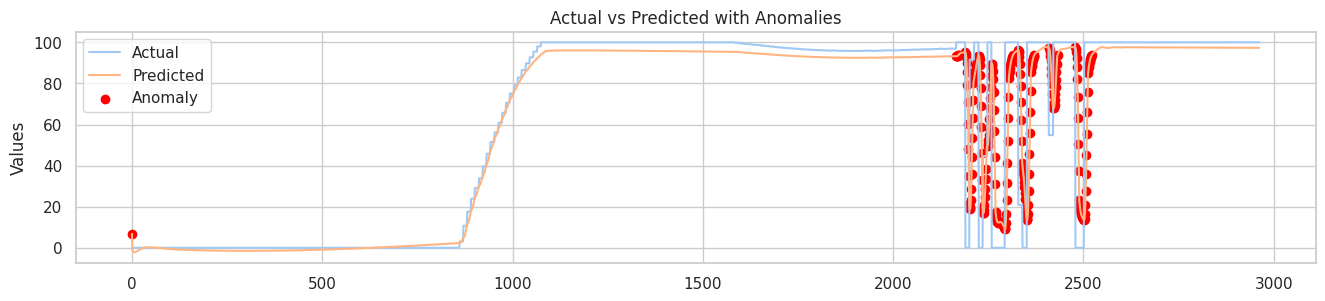

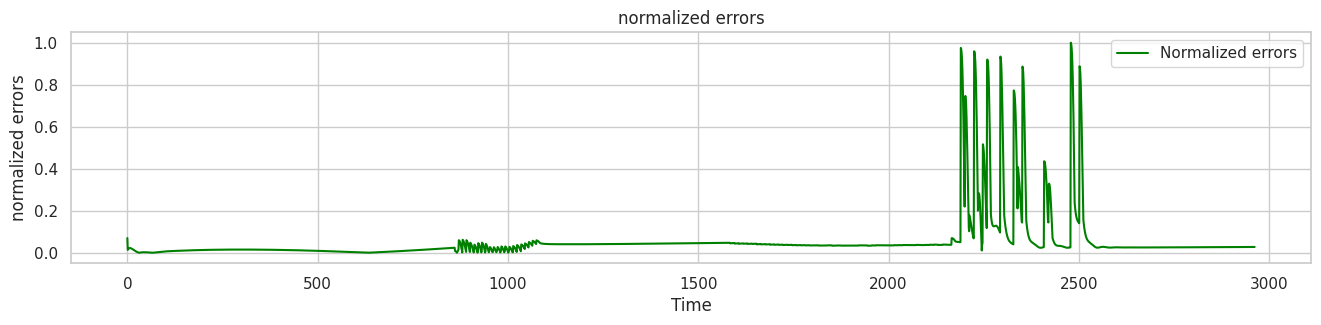

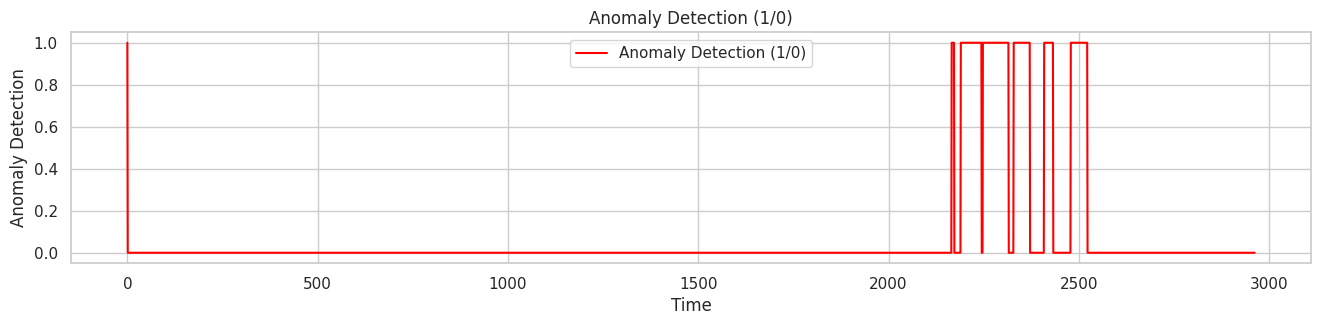

In [259]:
def plot_all_plot(errors,normalized_errors,threshold,anomaly_scores,anomalies,predicted_values,actual_values):

    anomaly_scores = normalized_errors[normalized_errors > threshold]

    # Plot actual vs predicted values with anomalies
    plt.figure(figsize=(16, 3))
    plt.plot(actual_values, label='Actual')
    plt.plot(predicted_values, label='Predicted')
    plt.title(f'Actual vs Predicted with Anomalies')
    
    # Highlight anomalies on the plot using their indices
    plt.scatter(np.where(normalized_errors > threshold)[0], anomalies, color='red', label='Anomaly')
    plt.legend()
    plt.ylabel('Values')
    output_path = '/kaggle/working/ActualvsPredictedwithAnomalies.png'
    plt.savefig(output_path, bbox_inches='tight')
    plt.show()
    # Plot anomaly scores separately
    plt.figure(figsize=(16, 3))
    plt.plot(normalized_errors, label='Normalized errors', color='green')

    plt.xlabel('Time')
    plt.ylabel('normalized errors')
    plt.title(f'normalized errors')
    plt.legend()
    output_path = '/kaggle/working/normalized errors.png'
    plt.savefig(output_path, bbox_inches='tight')          
    plt.show()


    # Create a separate plot for anomaly scores (1 for anomaly, 0 for normal data)
    anomaly_scores = [1 if error > threshold else 0 for error in normalized_errors]

    plt.figure(figsize=(16, 3))
    plt.plot(anomaly_scores, label='Anomaly Detection (1/0)', color='red')

    plt.xlabel('Time')
    plt.ylabel('Anomaly Detection')
    plt.title(f'Anomaly Detection (1/0)')
    plt.legend()
    output_path = '/kaggle/working/process_output_plot.png'
    plt.savefig(output_path, bbox_inches='tight')
    plt.show()
plot_all = plot_all_plot(errors,normalized_errors,threshold,anomaly_scores,anomalies,predicted_values_test, actual_values)

In [260]:
def data_saving(df3,actual_values,predicted_values_test,normalized_errors,anomaly_scores):
    sequence_length = 10
    time_values = df3.iloc[sequence_length-1:].reset_index(drop=True)['time']  # Assuming 'time' column exists
    time_values = time_values[:len(actual_values)]
    print(f'Shape of the time_values : {time_values.shape}')
    print(f'Shape of the actual_values : {actual_values.shape}')
    print(f'Shape of the predicted_values_test : {predicted_values_test.shape}')
    print(f'Shape of the error :{errors.shape}')
    print(f'Shape of the normalized_errors :{normalized_errors.shape}')
    print(f'Shape of the anomaly_scores : {len(anomaly_scores)}')
    # Create a DataFrame with actual and predicted values
    result_df = pd.DataFrame({
        'Time': time_values,
        'Actual': actual_values,
        'Predicted': predicted_values_test,
        'Error': errors,  # Error column
        'Normalized error': normalized_errors,
        'Classification': anomaly_scores
    })

    return result_df
result_df = data_saving(df1,actual_values,predicted_values_test,normalized_errors,anomaly_scores)
result_df

Shape of the time_values : (2963,)
Shape of the actual_values : (2963,)
Shape of the predicted_values_test : (2963,)
Shape of the error :(2963,)
Shape of the normalized_errors :(2963,)
Shape of the anomaly_scores : 2963


,Time,Actual,Predicted,Error,Normalized error,Classification
0,0.9,0.0,6.816424,6.816424,0.069927,1
1,1.0,0.0,-1.330204,1.330204,0.013646,0
2,1.1,0.0,-1.643353,1.643353,0.016859,0
3,1.2,0.0,-1.871750,1.871750,0.019202,0
4,1.3,0.0,-2.028919,2.028919,0.020814,0
...,...,...,...,...,...,...
2958,296.7,100.0,97.318939,2.681061,0.027504,0
2959,296.8,100.0,97.318008,2.681992,0.027514,0
2960,296.9,100.0,97.317070,2.682930,0.027523,0
2961,297.0,100.0,97.316132,2.683868,0.027533,0


In [261]:
# Assuming df is your DataFrame containing the data
last_time_value = result_df['Time'].iloc[-1]
filtered_df = df1[(df1['time'] >= result_df['Time'][0]) & (df1['time'] <= last_time_value)]
# Reset the index of filtered_df
filtered_df.reset_index(drop=True, inplace=True)
# Assuming df1 and df2 are the DataFrames you want to combine
# Concatenate along rows (axis=0)
combined_df = pd.concat([filtered_df, result_df], axis=1)

# Resetting index after concatenation (optional)
combined_df = combined_df.reset_index(drop=True)
combined_df

,time,CD_Level,CD_Press,CD_CondTemp,RXP(%),RCPFlowoutLP1(kg/s),RCPFlowoutLP2(kg/s),RXCTin (K),RXCTout (K),PZp (Pa),...,Hour,Minute,Second,Millisecond,Time,Actual,Predicted,Error,Normalized error,Classification
0,0.9,0.999925,5268.041237,306.683329,100.099366,8832.727940,8832.724478,562.685367,590.479679,1.511469e+07,...,1,28,21,59,0.9,0.0,6.816424,6.816424,0.069927,1
1,1.0,0.999853,5261.338004,306.661284,100.127070,8832.725954,8832.722302,562.642779,590.446570,1.511453e+07,...,1,28,21,160,1.0,0.0,-1.330204,1.330204,0.013646,0
2,1.1,0.999755,5252.411721,306.631928,100.156630,8833.273552,8833.269792,562.593411,590.415016,1.511427e+07,...,1,28,21,262,1.1,0.0,-1.643353,1.643353,0.016859,0
3,1.2,0.999629,5241.302711,306.595394,100.188727,8833.711972,8833.708136,562.537306,590.383177,1.511402e+07,...,1,28,21,362,1.2,0.0,-1.871750,1.871750,0.019202,0
4,1.3,0.999471,5228.075554,306.551894,100.223989,8833.893826,8833.889990,562.472637,590.349755,1.511379e+07,...,1,28,21,463,1.3,0.0,-2.028919,2.028919,0.020814,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2958,296.7,1.196783,5267.771606,306.682442,99.083206,8821.419229,8821.419235,563.050372,590.414888,1.496273e+07,...,1,33,16,877,296.7,100.0,97.318939,2.681061,0.027504,0
2959,296.8,1.196049,5267.788837,306.682499,99.083574,8821.419184,8821.419190,563.049874,590.414377,1.496248e+07,...,1,33,16,979,296.8,100.0,97.318008,2.681992,0.027514,0
2960,296.9,1.195317,5267.806162,306.682556,99.083941,8821.417121,8821.417127,563.049360,590.413871,1.496232e+07,...,1,33,17,72,296.9,100.0,97.317070,2.682930,0.027523,0
2961,297.0,1.194587,5267.823578,306.682613,99.084319,8821.417026,8821.417032,563.048869,590.413371,1.496207e+07,...,1,33,17,180,297.0,100.0,97.316132,2.683868,0.027533,0


In [262]:
combined_df.to_csv('process_output1_model1.csv', index=False)  # Save to a CSV file without including the index

In [263]:
output_df = combined_df

In [264]:
# Assuming you have a DataFrame named 'output_df' containing the predictions
# Columns: 'RF_Predictions', 'SVM_Predictions', 'GB_Predictions', 'LR_Predictions', 'NN_Binary_Predictions'

# Count occurrences of 1 and 0 in each model's predictions
rf_counts = output_df['Classification'].value_counts()


# Print the counts
print("LSTM Predictions:")
print(rf_counts)




LSTM Predictions:
Classification
0    2721
1     242
Name: count, dtype: int64


In [341]:
output_df['label'].value_counts()


label
Normal      2643
Abnormal     320
Name: count, dtype: int64

In [265]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Assuming you have a DataFrame named 'output_df' with columns:
# 'RF_Predictions', 'SVM_Predictions', 'GB_Predictions', 'LR_Predictions', 'XGboost_Predictions', 'NN_Binary_Predictions', 'Actual_Labels'

# Define a list of model names
model_names = ['Classification']

# Loop through each model
for i, model_name in enumerate(model_names):
    # Get the predictions and actual labels for the current model
    predictions_col = f'{model_name}'
    actual_labels = output_df['label']
    predictions = output_df[predictions_col]

    # Convert predicted labels to strings
    predictions = predictions.map({0: 'Normal', 1: 'Abnormal'})

    # Create a confusion matrix
    confusion_mat = confusion_matrix(actual_labels, predictions)

    # Print confusion matrix
    print(f"\nConfusion Matrix for {model_name}:")
    print(pd.DataFrame(confusion_mat, index=['Actual Normal', 'Actual Abnormal'], columns=['Predicted Normal', 'Predicted Abnormal']))

    # Generate and print classification report
    classification_rep = classification_report(actual_labels, predictions)
    print(f"\nClassification Report for {model_name}:")
    print(classification_rep)



Confusion Matrix for Classification:
                 Predicted Normal  Predicted Abnormal
Actual Normal                 197                 123
Actual Abnormal                45                2598

Classification Report for Classification:
              precision    recall  f1-score   support

    Abnormal       0.81      0.62      0.70       320
      Normal       0.95      0.98      0.97      2643

    accuracy                           0.94      2963
   macro avg       0.88      0.80      0.83      2963
weighted avg       0.94      0.94      0.94      2963



In [335]:
output_df['Classification'].value_counts()

Classification
0    2721
1     242
Name: count, dtype: int64

In [364]:

predictions = output_df['Classification']
predictions.value_counts()

Classification
0    2721
1     242
Name: count, dtype: int64

In [363]:
actual_labels.value_counts()

label
Normal      2643
Abnormal     320
Name: count, dtype: int64

In [365]:
actual_labels = output_df['label'].map({'Normal': 0, 'Abnormal': 1})
actual_labels

0       0
1       0
2       0
3       0
4       0
       ..
2958    0
2959    0
2960    0
2961    0
2962    0
Name: label, Length: 2963, dtype: int64

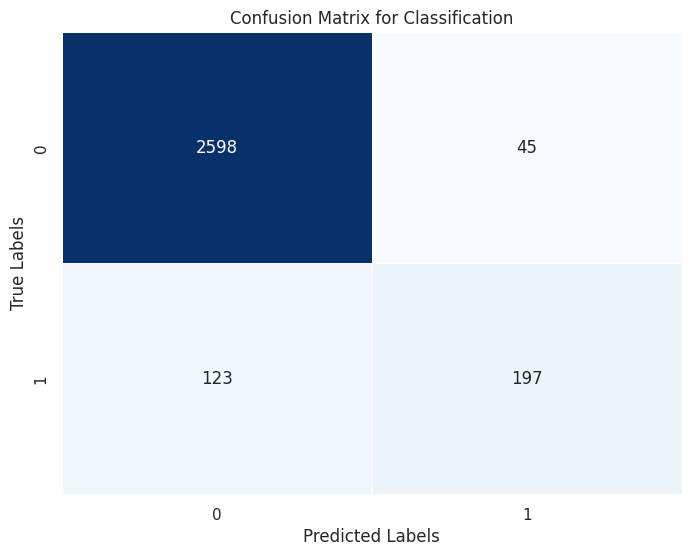


Classification Report for Classification:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2643
           1       0.81      0.62      0.70       320

    accuracy                           0.94      2963
   macro avg       0.88      0.80      0.83      2963
weighted avg       0.94      0.94      0.94      2963



In [367]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Assuming you have a DataFrame named 'output_df' with columns:
# 'RF_Predictions', 'SVM_Predictions', 'GB_Predictions', 'LR_Predictions', 'XGboost_Predictions', 'NN_Binary_Predictions', 'Actual_Labels'

# Define a list of model names
model_names = ['Classification']

# Loop through each model
for i, model_name in enumerate(model_names):
    # Get the predictions and actual labels for the current model
    predictions_col = f'{model_name}'
    actual_labels = output_df['label']
    predictions = output_df[predictions_col]
    actual_labels = output_df['label'].map({'Normal': 0, 'Abnormal': 1})

    # Convert predicted labels to strings
    #predictions = predictions.map({0: 'Normal', 1: 'Abnormal'})

    # Create a confusion matrix
    confusion_mat = confusion_matrix(actual_labels, predictions)

    # Create a colorful heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
                annot_kws={'size': 12}, linewidths=0.5,
                xticklabels=['0', '1'],
                yticklabels=['0', '1'])

    # Set plot labels and title
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {model_name}')
    output_path = '/kaggle/working/model_performance_metrics4.png'
    plt.savefig(output_path, bbox_inches='tight')
    # Display the plot
    plt.show()

    # Generate and print classification report
    classification_rep = classification_report(actual_labels, predictions)
    print(f"\nClassification Report for {model_name}:")
    print(classification_rep)


In [353]:
predictions = output_df['Classification']
predictions

0       1
1       0
2       0
3       0
4       0
       ..
2958    0
2959    0
2960    0
2961    0
2962    0
Name: Classification, Length: 2963, dtype: int64

In [356]:
actual_labels = actual_labels.map({0: 'Normal', 1: 'Abnormal'})
actual_labels

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
2958    NaN
2959    NaN
2960    NaN
2961    NaN
2962    NaN
Name: label, Length: 2963, dtype: object

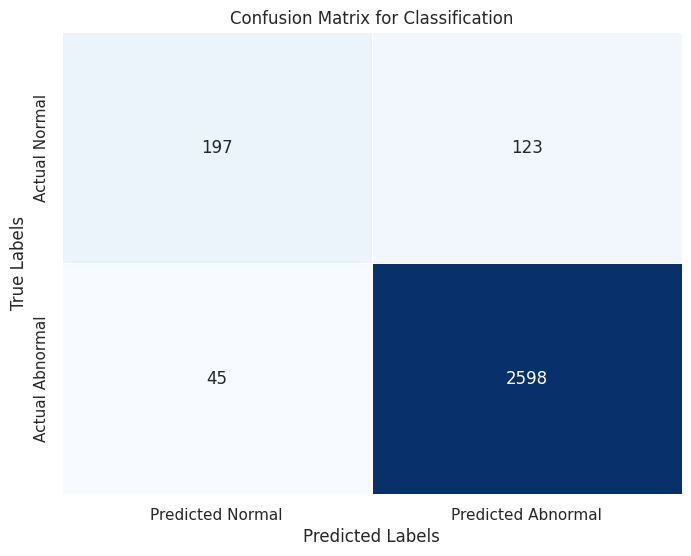


Classification Report for Classification:
              precision    recall  f1-score   support

    Abnormal       0.81      0.62      0.70       320
      Normal       0.95      0.98      0.97      2643

    accuracy                           0.94      2963
   macro avg       0.88      0.80      0.83      2963
weighted avg       0.94      0.94      0.94      2963



In [357]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Assuming you have a DataFrame named 'output_df' with columns:
# 'RF_Predictions', 'SVM_Predictions', 'GB_Predictions', 'LR_Predictions', 'XGboost_Predictions', 'NN_Binary_Predictions', 'Actual_Labels'

# Define a list of model names
model_names = ['Classification']

# Loop through each model
for i, model_name in enumerate(model_names):
    # Get the predictions and actual labels for the current model
    predictions_col = f'{model_name}'
    actual_labels = output_df['label']
    predictions = output_df[predictions_col]

    # Convert predicted labels to strings
    predictions = predictions.map({0: 'Normal', 1: 'Abnormal'})

    # Create a confusion matrix
    conf_matrix = confusion_matrix(actual_labels, predictions)

    # Create a colorful heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                annot_kws={'size': 12}, linewidths=0.5,
                xticklabels=['Predicted Normal', 'Predicted Abnormal'],
                yticklabels=['Actual Normal', 'Actual Abnormal'])

    # Set plot labels and title
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {model_name}')
    output_path = '/kaggle/working/model_performance_metrics4.png'
    plt.savefig(output_path, bbox_inches='tight')
    # Display the plot
    plt.show()

    # Generate and print classification report
    classification_rep = classification_report(actual_labels, predictions)
    print(f"\nClassification Report for {model_name}:")
    print(classification_rep)


In [267]:
df1 = pd.read_csv("/kaggle/working/plc_output2_model8.csv", encoding='ISO-8859-1')
df1.head()

,PLC Current cycle time,PLC The shortest cycle time,PLC The longest cycle time,PLC Min runtime,PLC Max runtime,PLC Running Status,Current_time,Pump Speed,SG lEVEL,Year,...,CycleTimeDifference,MaxRuntimeRatio,longestimetimeRatio,cycle_maxrun,RF_Predictions,SVM_Predictions,GB_Predictions,LR_Predictions,XGboost_Predictions,NN_Binary_Predictions
0,1083967,1001561,0,0,2063000,0,30:20.6,100.0,14.401727,2024,...,0.0,1.903194,0.0,0.000000,1,1,0,1,0,1
1,1010590,1001561,0,0,2063000,0,30:20.6,100.0,14.401727,2024,...,73377.0,2.041382,0.0,35944.770931,1,0,1,0,0,0
2,1140260,1001561,0,0,2063000,0,30:20.6,100.0,14.401727,2024,...,129670.0,1.809236,0.0,71671.116917,1,0,1,0,0,0
3,1010764,1001561,0,0,2063000,0,30:20.6,100.0,14.401727,2024,...,129496.0,2.041030,0.0,63446.386303,1,0,1,0,0,0
4,1012729,1001561,0,0,2063000,0,30:20.6,100.0,14.401727,2024,...,1965.0,2.037070,0.0,964.620691,0,1,1,1,0,0


In [268]:
df2 = pd.read_csv("/kaggle/working/network_output2_model8.csv", encoding='ISO-8859-1')
df2.head()

,No.,Time,Source,Destination,Protocol,Length,Time since previous frame in this TCP stream,Source Port,Destination Port,Sequence Number,...,Length.1,Byte Address,Info,label,RF_Predictions,SVM_Predictions,GB_Predictions,LR_Predictions,XGboost_Predictions,NN_Binary_Predictions
0,1,0.000000,192.168.1.241,192.168.1.1,COTP,61,0.000000,63749.0,102.0,1.0,...,0.0,0.0,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal,0,0,0,0,0,0
1,2,0.132074,192.168.0.2,192.168.0.1,COTP,145,0.000000,60414.0,102.0,1.0,...,0.0,0.0,DT TPDU (0) EOT,Normal,0,0,0,0,0,0
2,3,0.132577,192.168.0.2,192.168.0.1,COTP,61,0.000503,60414.0,102.0,92.0,...,0.0,0.0,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal,0,0,0,0,0,0
3,4,0.132814,192.168.0.2,192.168.0.1,COTP,61,0.000237,60414.0,102.0,99.0,...,0.0,0.0,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal,0,0,0,0,0,0
4,5,0.200259,192.168.0.2,224.0.0.22,IGMPv3,54,0.000000,0.0,0.0,0.0,...,0.0,0.0,Membership Report / Leave group 224.0.0.252,Normal,0,1,0,1,0,1


In [269]:

# Assuming 'original_df' is your DataFrame
# Filter out rows with 'OpcUa' in the 'Protocol' column
df2 = df2[~df2['Protocol'].str.contains('OpcUa')]
# Assuming 'original_df' is your DataFrame
# Filter out rows with 'OpcUa' in the 'Protocol' column
#df2 = df2[~df2['Protocol'].str.contains('COTP')]

# Display the filtered DataFrame
df2.head()


,No.,Time,Source,Destination,Protocol,Length,Time since previous frame in this TCP stream,Source Port,Destination Port,Sequence Number,...,Length.1,Byte Address,Info,label,RF_Predictions,SVM_Predictions,GB_Predictions,LR_Predictions,XGboost_Predictions,NN_Binary_Predictions
0,1,0.000000,192.168.1.241,192.168.1.1,COTP,61,0.000000,63749.0,102.0,1.0,...,0.0,0.0,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal,0,0,0,0,0,0
1,2,0.132074,192.168.0.2,192.168.0.1,COTP,145,0.000000,60414.0,102.0,1.0,...,0.0,0.0,DT TPDU (0) EOT,Normal,0,0,0,0,0,0
2,3,0.132577,192.168.0.2,192.168.0.1,COTP,61,0.000503,60414.0,102.0,92.0,...,0.0,0.0,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal,0,0,0,0,0,0
3,4,0.132814,192.168.0.2,192.168.0.1,COTP,61,0.000237,60414.0,102.0,99.0,...,0.0,0.0,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal,0,0,0,0,0,0
4,5,0.200259,192.168.0.2,224.0.0.22,IGMPv3,54,0.000000,0.0,0.0,0.0,...,0.0,0.0,Membership Report / Leave group 224.0.0.252,Normal,0,1,0,1,0,1


In [270]:
df3 = pd.read_csv("/kaggle/working/process_output1_model1.csv", encoding='ISO-8859-1')
df3.head()

,time,CD_Level,CD_Press,CD_CondTemp,RXP(%),RCPFlowoutLP1(kg/s),RCPFlowoutLP2(kg/s),RXCTin (K),RXCTout (K),PZp (Pa),...,Hour,Minute,Second,Millisecond,Time,Actual,Predicted,Error,Normalized error,Classification
0,0.9,0.999925,5268.041237,306.683329,100.099366,8832.727940,8832.724478,562.685367,590.479679,1.511469e+07,...,1,28,21,59,0.9,0.0,6.816424,6.816424,0.069927,1
1,1.0,0.999853,5261.338004,306.661284,100.127070,8832.725954,8832.722302,562.642779,590.446570,1.511453e+07,...,1,28,21,160,1.0,0.0,-1.330204,1.330204,0.013646,0
2,1.1,0.999755,5252.411721,306.631928,100.156630,8833.273552,8833.269792,562.593411,590.415016,1.511427e+07,...,1,28,21,262,1.1,0.0,-1.643353,1.643353,0.016859,0
3,1.2,0.999629,5241.302711,306.595394,100.188727,8833.711972,8833.708136,562.537306,590.383177,1.511402e+07,...,1,28,21,362,1.2,0.0,-1.871750,1.871750,0.019202,0
4,1.3,0.999471,5228.075554,306.551894,100.223989,8833.893826,8833.889990,562.472637,590.349755,1.511379e+07,...,1,28,21,463,1.3,0.0,-2.028920,2.028919,0.020814,0


In [271]:
import pandas as pd
import re

# Create DataFrame (assuming df2 is already created with 'Arrival Time' column)
df2 = pd.DataFrame(df2)

# Define a function to split the strings
def split_arrival_time(row):
    split_data = re.split(r',|\s|:|\.\s', row['Arrival Time'])
    return split_data


result = df2.apply(split_arrival_time, axis=1, result_type='expand')
result  # Check the shape to see the number of columns


,0,1,2,3,4,5,6,7,8,9
0,Jan,23,,2024,01,30,13.030495000,China,Standard,Time
1,Jan,23,,2024,01,30,13.162569000,China,Standard,Time
2,Jan,23,,2024,01,30,13.163072000,China,Standard,Time
3,Jan,23,,2024,01,30,13.163309000,China,Standard,Time
4,Jan,23,,2024,01,30,13.230754000,China,Standard,Time
...,...,...,...,...,...,...,...,...,...,...
3971,Jan,23,,2024,01,33,10.429856000,China,Standard,Time
3972,Jan,23,,2024,01,33,10.429975000,China,Standard,Time
3973,Jan,23,,2024,01,33,10.430046000,China,Standard,Time
3974,Jan,23,,2024,01,33,10.561245000,China,Standard,Time


In [272]:
# Apply the function to create new columns
df2[['Month','Day', 'Space', 'Year', 'Hour', 'Minute', 'Second', 'Country', 'Standard', 'Time']] = df2.apply(split_arrival_time, axis=1, result_type='expand')

# Splitting the 'Time' column into 'Second' and 'Millisecond' columns
df2[['second', 'Millisecond']] = df2['Second'].str.split('.', expand=True)


# Padding the Millisecond column to ensure it has 6 digits
df2['Millisecond'] = df2['Millisecond'].str.pad(6, side='right', fillchar='0')

# Convert 'Millisecond' column to strings
df2['Millisecond'] = df2['Millisecond'].astype(str)

# Extract the first four digits into a new column 'Milliseconds'
df2['Milliseconds'] = df2['Millisecond'].str[:4]
columns_to_drop = ['Space', 'Standard']
df2.drop(columns=columns_to_drop, inplace=True)


In [273]:
# Assuming 'second' & minute is the column you want to convert
df1['Second'] = pd.to_numeric(df1['Second'], errors='coerce').fillna(0).astype(int)
df1['Minute'] = pd.to_numeric(df1['Minute'], errors='coerce').fillna(0).astype(int)
df1['Millisecond'] = pd.to_numeric(df1['Millisecond'], errors='coerce').fillna(0).astype(int)
# Create a new column 'Time_in_ms' representing time in milliseconds
df1['Time_in_ms'] = df1['Minute'] * 60 * 1000 + df1['Second'] * 1000 + df1['Millisecond']

# Assuming 'second' & minute is the column you want to convert
df2['second'] = pd.to_numeric(df2['second'], errors='coerce').fillna(0).astype(int)
df2['Minute'] = pd.to_numeric(df2['Minute'], errors='coerce').fillna(0).astype(int)
df2['Millisecond'] = pd.to_numeric(df2['Millisecond'], errors='coerce').fillna(0).astype(int)
# Create a new column 'Time_in_ms' representing time in milliseconds
df2['Time_in_ms'] = df2['Minute'] * 60 * 1000 + df2['second'] * 1000 + df2['Millisecond']

In [274]:
# Assuming 'second' & minute is the column you want to convert
df3['Second'] = pd.to_numeric(df3['Second'], errors='coerce').fillna(0).astype(int)
df3['Minute'] = pd.to_numeric(df3['Minute'], errors='coerce').fillna(0).astype(int)
df3['Millisecond'] = pd.to_numeric(df3['Millisecond'], errors='coerce').fillna(0).astype(int)
# Create a new column 'Time_in_ms' representing time in milliseconds
df3['Time_in_ms'] = df3['Minute'] * 60 * 1000 + df3['Second'] * 1000 + df3['Millisecond']

In [275]:
# Find the maximum value in the column
max_value = df1['Time_in_ms'].max()

# Scale all values in the column proportionally
df1['Millisecond_scale'] = (df1['Time_in_ms'] / max_value) * 100

# Find the maximum value in the column
max_value = df2['Time_in_ms'].max()

# Scale all values in the column proportionally
df2['Millisecond_scale'] = (df2['Time_in_ms'] / max_value) * 100




In [276]:

# Find the maximum value in the column
max_value = df3['Time_in_ms'].max()

# Scale all values in the column proportionally
df3['Millisecond_scale'] = (df3['Time_in_ms'] / max_value) * 100

In [277]:
df1.head()

,PLC Current cycle time,PLC The shortest cycle time,PLC The longest cycle time,PLC Min runtime,PLC Max runtime,PLC Running Status,Current_time,Pump Speed,SG lEVEL,Year,...,longestimetimeRatio,cycle_maxrun,RF_Predictions,SVM_Predictions,GB_Predictions,LR_Predictions,XGboost_Predictions,NN_Binary_Predictions,Time_in_ms,Millisecond_scale
0,1083967,1001561,0,0,2063000,0,30:20.6,100.0,14.401727,2024,...,0.0,0.000000,1,1,0,1,0,1,1820618,91.490686
1,1010590,1001561,0,0,2063000,0,30:20.6,100.0,14.401727,2024,...,0.0,35944.770931,1,0,1,0,0,0,1820625,91.491038
2,1140260,1001561,0,0,2063000,0,30:20.6,100.0,14.401727,2024,...,0.0,71671.116917,1,0,1,0,0,0,1820632,91.491390
3,1010764,1001561,0,0,2063000,0,30:20.6,100.0,14.401727,2024,...,0.0,63446.386303,1,0,1,0,0,0,1820637,91.491641
4,1012729,1001561,0,0,2063000,0,30:20.6,100.0,14.401727,2024,...,0.0,964.620691,0,1,1,1,0,0,1820644,91.491993


In [278]:
df2.head()

,No.,Time,Source,Destination,Protocol,Length,Time since previous frame in this TCP stream,Source Port,Destination Port,Sequence Number,...,Year,Hour,Minute,Second,Country,second,Millisecond,Milliseconds,Time_in_ms,Millisecond_scale
0,1,Time,192.168.1.241,192.168.1.1,COTP,61,0.000000,63749.0,102.0,1.0,...,2024,01,30,13.030495000,China,13,30495000,0304,32308000,3.226393
1,2,Time,192.168.0.2,192.168.0.1,COTP,145,0.000000,60414.0,102.0,1.0,...,2024,01,30,13.162569000,China,13,162569000,1625,164382000,16.415776
2,3,Time,192.168.0.2,192.168.0.1,COTP,61,0.000503,60414.0,102.0,92.0,...,2024,01,30,13.163072000,China,13,163072000,1630,164885000,16.466007
3,4,Time,192.168.0.2,192.168.0.1,COTP,61,0.000237,60414.0,102.0,99.0,...,2024,01,30,13.163309000,China,13,163309000,1633,165122000,16.489675
4,5,Time,192.168.0.2,224.0.0.22,IGMPv3,54,0.000000,0.0,0.0,0.0,...,2024,01,30,13.230754000,China,13,230754000,2307,232567000,23.224975


In [279]:

# Rename columns
df2 = df2.rename(columns={'Second': 'second', 'second': 'Second'})
df2['Second']

0       13
1       13
2       13
3       13
4       13
        ..
3971    10
3972    10
3973    10
3974    10
3975    10
Name: Second, Length: 3976, dtype: int64

In [280]:
df3.head()

,time,CD_Level,CD_Press,CD_CondTemp,RXP(%),RCPFlowoutLP1(kg/s),RCPFlowoutLP2(kg/s),RXCTin (K),RXCTout (K),PZp (Pa),...,Second,Millisecond,Time,Actual,Predicted,Error,Normalized error,Classification,Time_in_ms,Millisecond_scale
0,0.9,0.999925,5268.041237,306.683329,100.099366,8832.727940,8832.724478,562.685367,590.479679,1.511469e+07,...,21,59,0.9,0.0,6.816424,6.816424,0.069927,1,1701059,85.169121
1,1.0,0.999853,5261.338004,306.661284,100.127070,8832.725954,8832.722302,562.642779,590.446570,1.511453e+07,...,21,160,1.0,0.0,-1.330204,1.330204,0.013646,0,1701160,85.174178
2,1.1,0.999755,5252.411721,306.631928,100.156630,8833.273552,8833.269792,562.593411,590.415016,1.511427e+07,...,21,262,1.1,0.0,-1.643353,1.643353,0.016859,0,1701262,85.179285
3,1.2,0.999629,5241.302711,306.595394,100.188727,8833.711972,8833.708136,562.537306,590.383177,1.511402e+07,...,21,362,1.2,0.0,-1.871750,1.871750,0.019202,0,1701362,85.184291
4,1.3,0.999471,5228.075554,306.551894,100.223989,8833.893826,8833.889990,562.472637,590.349755,1.511379e+07,...,21,463,1.3,0.0,-2.028920,2.028919,0.020814,0,1701463,85.189348


In [281]:
# Get unique minutes from both DataFrames
unique_minutes_df1 = df1['Minute'].unique()
unique_minutes_df2 = df2['Minute'].unique()
unique_minutes_df3 = df3['Minute'].unique()

unique_second_df1 = df1['Second'].unique()
unique_second_df2 = df2['Second'].unique()
unique_second_df3 = df3['Second'].unique()

print(unique_minutes_df1)
print(unique_second_df1)

print(unique_minutes_df2)
print(unique_second_df2)

print(unique_minutes_df3)
print(unique_second_df3)

[30 31 32 33]
[20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43
 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59  0  1  2  3  4  5  6  7
  8  9 10 11 12 13 14 15 16 17 18 19]
[30 31 32 33]
[13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36
 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59  0
  1  2  3  4  5  6  7  8  9 10 11 12]
[28 29 30 31 32 33]
[21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44
 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59  0  1  2  3  4  5  6  7  8
  9 10 11 12 13 14 15 16 17 18 19 20]


In [282]:
# Find common minutes among DataFrames
common_minutes = set(unique_minutes_df1) & set(unique_minutes_df2) & set(unique_minutes_df3)

if common_minutes:
    # Define variables for the common range
    common_minutes_range = sorted(list(common_minutes))
    start_minute = common_minutes_range[0]
    end_minute = common_minutes_range[-1]

    print(f"Common minutes range: {start_minute} to {end_minute}")
    # You can use start_minute and end_minute variables for further processing
else:
    print("No common minutes found among the DataFrames.")


Common minutes range: 30 to 33


In [283]:
# Rename columns
df1 = df1.rename(columns={'NN_Binary_Predictions': 'PLC_output'})
df2 = df2.rename(columns={'GB_Predictions': 'Network_output'})
df3 = df3.rename(columns={'Classification': 'Process_output'})

In [284]:
 # Filter df1
filtered_df1 = df1[(df1['Minute'] >= start_minute+1) & (df1['Minute'] <= end_minute-1)]

    # Filter df2
filtered_df2 = df2[(df2['Minute'] >= start_minute+1) & (df2['Minute'] <= end_minute-1)]

    # Filter df3
filtered_df3 = df3[(df3['Minute'] >= start_minute+1) & (df3['Minute'] <= end_minute-1)]


In [285]:
def network_time(df):
    # Retrieve unique values from 'Minute' column and convert to a list
    minute_values = df['Minute'].unique().tolist()
    # Retrieve unique values from 'Minute' column and convert to a list
    second_values = df['Second'].unique().tolist()
    #second_values = sorted(second_values)
    # Initialize an empty list to store dictionaries
    result_data = []


    # Loop over minute_values and second_values
    for i in minute_values:
        #print(f'{i}.nci minute done')
        df_minute = df[df['Minute'] == i]
        for j in second_values:
            #print(f'{j}.nci second done')
            df_second = df_minute[df_minute['Second'] == j]
            
            a = list(df_second['Network_output'])
            # Separate values equal to 0 and 1 into different lists for Network_output
            a_0 = [val for val in a if val == 0]
            a_1 = [val for val in a if val == 1]

            if len(a_0) + len(a_1) > 0:
                probability_a0 = len(a_0) / (len(a_0) + len(a_1))
                probability_a1 = 1 - probability_a0
                if probability_a0>0.8:
                    max_value_a =0
                else:
                    max_value_a =1
                
            else:
                # Handle the case when both lists have zero length
                probability_a0 = 0
                probability_a1 = 0

            
            result_data.append({
                'Minute': i,
                'Second': j,
                'Network_output': max_value_a,

                'Network_Probability_0': probability_a0 or 0,
                'Network_Probability_1': probability_a1

            })

    # Create a DataFrame outside the loop using the list of dictionaries
    result_df = pd.DataFrame(result_data)
    return result_df

network_data = network_time(filtered_df2)


In [286]:
network_data

,Minute,Second,Network_output,Network_Probability_0,Network_Probability_1
0,31,0,1,0.302326,0.697674
1,31,1,1,0.341463,0.658537
2,31,2,1,0.317073,0.682927
3,31,3,1,0.469388,0.530612
4,31,4,1,0.333333,0.666667
...,...,...,...,...,...
115,32,55,0,1.000000,0.000000
116,32,56,0,0.937500,0.062500
117,32,57,0,0.928571,0.071429
118,32,58,0,1.000000,0.000000


In [287]:
def plc_time(df):
    # Retrieve unique values from 'Minute' column and convert to a list
    minute_values = df['Minute'].unique().tolist()
    # Retrieve unique values from 'Minute' column and convert to a list
    second_values = df['Second'].unique().tolist()
    #second_values = sorted(second_values)
    # Initialize an empty list to store dictionaries
    result_data = []


    # Loop over minute_values and second_values
    for i in minute_values:
        #print(f'{i}.nci minute done')
        df_minute = df[df['Minute'] == i]
        for j in second_values:
            #print(f'{j}.nci second done')
            df_second = df_minute[df_minute['Second'] == j]

            a = list(df_second['PLC_output'])
            # Separate values equal to 0 and 1 into different lists for Network_output
            a_0 = [val for val in a if val == 0]
            a_1 = [val for val in a if val == 1]

            if len(a_0) + len(a_1) > 0:
                probability_a0 = len(a_0) / (len(a_0) + len(a_1))
                probability_a1 = 1 - probability_a0
                if probability_a0>0.8:
                    max_value_a =0
                else:
                    max_value_a =1
            else:
                # Handle the case when both lists have zero length
                probability_a0 = 0
                probability_a1 = 0


            result_data.append({
                'Minute': i,
                'Second': j,
                'PLC_output': max_value_a,
                'PLC_Probability_0': probability_a0 or 0,
                'PLC_Probability_1': probability_a1

            })

    # Create a DataFrame outside the loop using the list of dictionaries
    result_df = pd.DataFrame(result_data)
    return result_df

plc_data = plc_time(filtered_df1)


In [288]:
plc_data

,Minute,Second,PLC_output,PLC_Probability_0,PLC_Probability_1
0,31,0,0,0.926174,0.073826
1,31,1,0,0.929078,0.070922
2,31,2,0,0.946667,0.053333
3,31,3,0,0.910345,0.089655
4,31,4,0,0.889655,0.110345
...,...,...,...,...,...
115,32,55,0,0.935065,0.064935
116,32,56,0,0.922581,0.077419
117,32,57,0,0.927152,0.072848
118,32,58,0,0.935065,0.064935


In [289]:
def process_time(df):
    # Retrieve unique values from 'Minute' column and convert to a list
    minute_values = df['Minute'].unique().tolist()
    # Retrieve unique values from 'Minute' column and convert to a list
    second_values = df['Second'].unique().tolist()
    #second_values = sorted(second_values)
    # Initialize an empty list to store dictionaries
    result_data = []


    # Loop over minute_values and second_values
    for i in minute_values:
        #print(f'{i}.nci minute done')
        df_minute = df[df['Minute'] == i]
        for j in second_values:
            #print(f'{j}.nci second done')
            df_second = df_minute[df_minute['Second'] == j]

            a = list(df_second['Process_output'])
            # Separate values equal to 0 and 1 into different lists for Network_output
            a_0 = [val for val in a if val == 0]
            a_1 = [val for val in a if val == 1]

            if len(a_0) + len(a_1) > 0:
                probability_a0 = len(a_0) / (len(a_0) + len(a_1))
                probability_a1 = 1 - probability_a0
                if probability_a0>0.8:
                    max_value_a =0
                else:
                    max_value_a =1
            else:
                # Handle the case when both lists have zero length
                probability_a0 = 0
                probability_a1 = 0


            result_data.append({
                'Minute': i,
                'Second': j,
                'Process_output': max_value_a,
                'Process_Probability_0': probability_a0 or 0,
                'Process_Probability_1': probability_a1

            })

    # Create a DataFrame outside the loop using the list of dictionaries
    result_df = pd.DataFrame(result_data)
    return result_df

process_data = process_time(filtered_df3)


In [290]:
process_data

,Minute,Second,Process_output,Process_Probability_0,Process_Probability_1
0,31,0,0,1.0,0.0
1,31,1,0,1.0,0.0
2,31,2,0,1.0,0.0
3,31,3,0,1.0,0.0
4,31,4,0,1.0,0.0
...,...,...,...,...,...
115,32,55,0,1.0,0.0
116,32,56,0,1.0,0.0
117,32,57,0,1.0,0.0
118,32,58,0,1.0,0.0


In [291]:
columns_df1 = ['PLC_output','PLC_Probability_0','PLC_Probability_1']
filtered_df1 = plc_data[columns_df1]
columns_df3 = ['Process_output','Process_Probability_0','Process_Probability_1']
filtered_df3 = process_data[columns_df3]
columns_df2 = ['Minute','Second','Network_output','Network_Probability_0','Network_Probability_1']
filtered_df2 = network_data[columns_df2]

In [292]:
# Reset indexes of filtered_df1, filtered_df2, filtered_df3
filtered_df1.reset_index(drop=True, inplace=True)
filtered_df2.reset_index(drop=True, inplace=True)
filtered_df3.reset_index(drop=True, inplace=True)

# Concatenate the DataFrames side by side
comb_df = pd.concat([filtered_df2,filtered_df1, filtered_df3], axis=1)

comb_df

,Minute,Second,Network_output,Network_Probability_0,Network_Probability_1,PLC_output,PLC_Probability_0,PLC_Probability_1,Process_output,Process_Probability_0,Process_Probability_1
0,31,0,1,0.302326,0.697674,0,0.926174,0.073826,0,1.0,0.0
1,31,1,1,0.341463,0.658537,0,0.929078,0.070922,0,1.0,0.0
2,31,2,1,0.317073,0.682927,0,0.946667,0.053333,0,1.0,0.0
3,31,3,1,0.469388,0.530612,0,0.910345,0.089655,0,1.0,0.0
4,31,4,1,0.333333,0.666667,0,0.889655,0.110345,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
115,32,55,0,1.000000,0.000000,0,0.935065,0.064935,0,1.0,0.0
116,32,56,0,0.937500,0.062500,0,0.922581,0.077419,0,1.0,0.0
117,32,57,0,0.928571,0.071429,0,0.927152,0.072848,0,1.0,0.0
118,32,58,0,1.000000,0.000000,0,0.935065,0.064935,0,1.0,0.0


In [293]:
final_data = comb_df
# Create a new column 'Attack_Type' based on conditions
final_data['Attack_Type'] = 'Normal'  # Default value

# Conditions for classification
final_data.loc[(final_data['Network_output'] == 1) & (final_data['PLC_output'] == 0) & (final_data['Process_output'] == 0), 'Attack_Type'] = 'IT attacks'
final_data.loc[(final_data['Network_output'] == 0) & (final_data['PLC_output'] == 0) & (final_data['Process_output'] == 0) , 'Attack_Type'] = 'Normal'
final_data.loc[(final_data['Network_output'] == 1) & (final_data['PLC_output'] == 1) & (final_data['Process_output'] == 0), 'Attack_Type'] = 'ICS attacks'
final_data.loc[(final_data['Network_output'] == 0) & (final_data['PLC_output'] == 1) & (final_data['Process_output'] == 0), 'Attack_Type'] = 'ICS failures'

final_data.loc[(final_data['Network_output'] == 0) & (final_data['PLC_output'] == 0) & (final_data['Process_output'] == 1), 'Attack_Type'] = 'Process Fault'
final_data.loc[(final_data['Network_output'] == 0) & (final_data['PLC_output'] == 1) & (final_data['Process_output'] == 1), 'Attack_Type'] = 'ICS failures causing process faults'
final_data.loc[(final_data['Network_output'] == 1) & (final_data['PLC_output'] == 0) & (final_data['Process_output'] == 1), 'Attack_Type'] = 'NPP attacks causing process faults'
final_data.loc[(final_data['Network_output'] == 1) & (final_data['PLC_output'] == 1) & (final_data['Process_output'] == 1), 'Attack_Type'] = 'NPP attacks causing both ICS faults process faults'
# Define the desired column order
new_column_order = ['Minute', 'Second', 'Network_output', 'PLC_output', 'Process_output','Network_Probability_0', 'Network_Probability_1',
       'PLC_Probability_0', 'PLC_Probability_1', 'Process_Probability_0',
       'Process_Probability_1','Attack_Type']

# Reorder columns in the DataFrame
final_data = final_data[new_column_order]

# Display the updated DataFrame with the new column order and classification
final_data

,Minute,Second,Network_output,PLC_output,Process_output,Network_Probability_0,Network_Probability_1,PLC_Probability_0,PLC_Probability_1,Process_Probability_0,Process_Probability_1,Attack_Type
0,31,0,1,0,0,0.302326,0.697674,0.926174,0.073826,1.0,0.0,IT attacks
1,31,1,1,0,0,0.341463,0.658537,0.929078,0.070922,1.0,0.0,IT attacks
2,31,2,1,0,0,0.317073,0.682927,0.946667,0.053333,1.0,0.0,IT attacks
3,31,3,1,0,0,0.469388,0.530612,0.910345,0.089655,1.0,0.0,IT attacks
4,31,4,1,0,0,0.333333,0.666667,0.889655,0.110345,1.0,0.0,IT attacks
...,...,...,...,...,...,...,...,...,...,...,...,...
115,32,55,0,0,0,1.000000,0.000000,0.935065,0.064935,1.0,0.0,Normal
116,32,56,0,0,0,0.937500,0.062500,0.922581,0.077419,1.0,0.0,Normal
117,32,57,0,0,0,0.928571,0.071429,0.927152,0.072848,1.0,0.0,Normal
118,32,58,0,0,0,1.000000,0.000000,0.935065,0.064935,1.0,0.0,Normal


In [294]:
final_data.to_csv('final_data_result.csv', index=False)  # Save to a CSV file without including the index

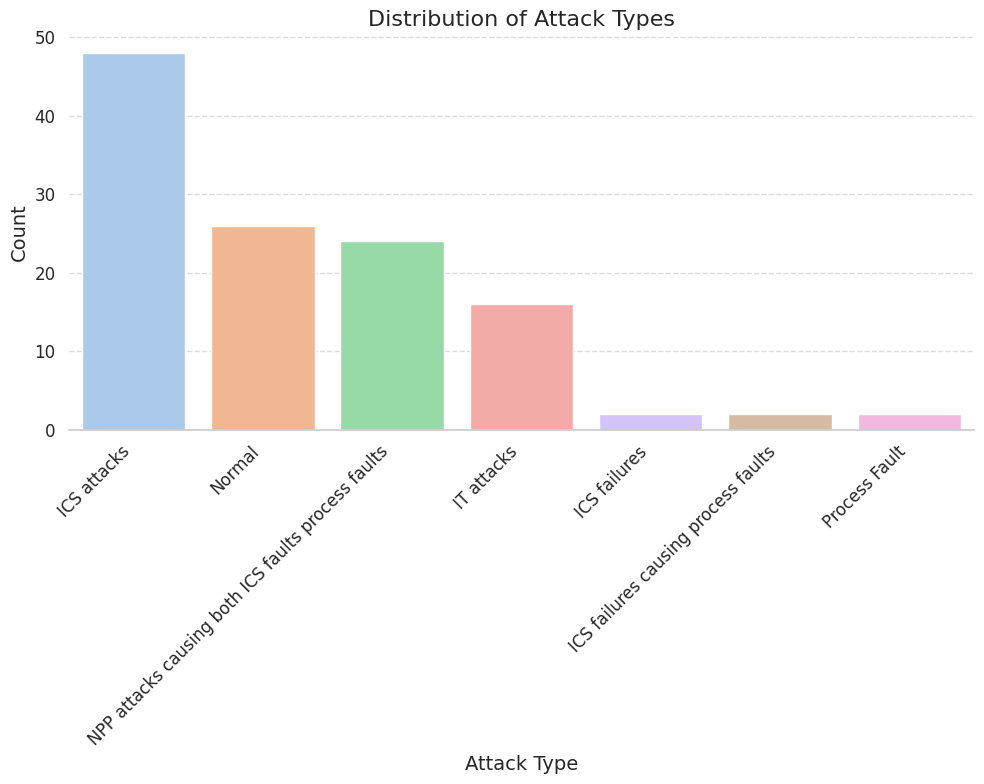

In [295]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(style="whitegrid", palette="pastel")

# Assuming 'final_data' is your DataFrame containing the 'Attack_Type' column

# Get value counts of 'Attack_Type' and sort by count in descending order
attack_type_counts = final_data['Attack_Type'].value_counts()
sorted_attack_types = attack_type_counts.index.tolist()

# Count plot for Attack_Type with customized aesthetics and sorted order
plt.figure(figsize=(10, 8))
ax = sns.countplot(data=final_data, x='Attack_Type', order=sorted_attack_types)

# Customizing plot aesthetics
ax.set_title('Distribution of Attack Types', fontsize=16)
ax.set_xlabel('Attack Type', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Adding grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adding plot borders
sns.despine(left=True)

plt.tight_layout()
output_path = '/kaggle/working/Distribution_of_attacks1.png'
plt.savefig(output_path, bbox_inches='tight')
plt.show()


In [296]:
df1 = pd.read_csv("/kaggle/working/plc_output2_model8.csv", encoding='ISO-8859-1')
df1.head()

,PLC Current cycle time,PLC The shortest cycle time,PLC The longest cycle time,PLC Min runtime,PLC Max runtime,PLC Running Status,Current_time,Pump Speed,SG lEVEL,Year,...,CycleTimeDifference,MaxRuntimeRatio,longestimetimeRatio,cycle_maxrun,RF_Predictions,SVM_Predictions,GB_Predictions,LR_Predictions,XGboost_Predictions,NN_Binary_Predictions
0,1083967,1001561,0,0,2063000,0,30:20.6,100.0,14.401727,2024,...,0.0,1.903194,0.0,0.000000,1,1,0,1,0,1
1,1010590,1001561,0,0,2063000,0,30:20.6,100.0,14.401727,2024,...,73377.0,2.041382,0.0,35944.770931,1,0,1,0,0,0
2,1140260,1001561,0,0,2063000,0,30:20.6,100.0,14.401727,2024,...,129670.0,1.809236,0.0,71671.116917,1,0,1,0,0,0
3,1010764,1001561,0,0,2063000,0,30:20.6,100.0,14.401727,2024,...,129496.0,2.041030,0.0,63446.386303,1,0,1,0,0,0
4,1012729,1001561,0,0,2063000,0,30:20.6,100.0,14.401727,2024,...,1965.0,2.037070,0.0,964.620691,0,1,1,1,0,0


In [297]:
df2 = pd.read_csv("/kaggle/working/network_output2_model8.csv", encoding='ISO-8859-1')
df2.head()

,No.,Time,Source,Destination,Protocol,Length,Time since previous frame in this TCP stream,Source Port,Destination Port,Sequence Number,...,Length.1,Byte Address,Info,label,RF_Predictions,SVM_Predictions,GB_Predictions,LR_Predictions,XGboost_Predictions,NN_Binary_Predictions
0,1,0.000000,192.168.1.241,192.168.1.1,COTP,61,0.000000,63749.0,102.0,1.0,...,0.0,0.0,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal,0,0,0,0,0,0
1,2,0.132074,192.168.0.2,192.168.0.1,COTP,145,0.000000,60414.0,102.0,1.0,...,0.0,0.0,DT TPDU (0) EOT,Normal,0,0,0,0,0,0
2,3,0.132577,192.168.0.2,192.168.0.1,COTP,61,0.000503,60414.0,102.0,92.0,...,0.0,0.0,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal,0,0,0,0,0,0
3,4,0.132814,192.168.0.2,192.168.0.1,COTP,61,0.000237,60414.0,102.0,99.0,...,0.0,0.0,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal,0,0,0,0,0,0
4,5,0.200259,192.168.0.2,224.0.0.22,IGMPv3,54,0.000000,0.0,0.0,0.0,...,0.0,0.0,Membership Report / Leave group 224.0.0.252,Normal,0,1,0,1,0,1


In [298]:

# Assuming 'original_df' is your DataFrame
# Filter out rows with 'OpcUa' in the 'Protocol' column
df2 = df2[~df2['Protocol'].str.contains('OpcUa')]
# Assuming 'original_df' is your DataFrame
# Filter out rows with 'OpcUa' in the 'Protocol' column
#df2 = df2[~df2['Protocol'].str.contains('COTP')]

# Display the filtered DataFrame
df2.head()


,No.,Time,Source,Destination,Protocol,Length,Time since previous frame in this TCP stream,Source Port,Destination Port,Sequence Number,...,Length.1,Byte Address,Info,label,RF_Predictions,SVM_Predictions,GB_Predictions,LR_Predictions,XGboost_Predictions,NN_Binary_Predictions
0,1,0.000000,192.168.1.241,192.168.1.1,COTP,61,0.000000,63749.0,102.0,1.0,...,0.0,0.0,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal,0,0,0,0,0,0
1,2,0.132074,192.168.0.2,192.168.0.1,COTP,145,0.000000,60414.0,102.0,1.0,...,0.0,0.0,DT TPDU (0) EOT,Normal,0,0,0,0,0,0
2,3,0.132577,192.168.0.2,192.168.0.1,COTP,61,0.000503,60414.0,102.0,92.0,...,0.0,0.0,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal,0,0,0,0,0,0
3,4,0.132814,192.168.0.2,192.168.0.1,COTP,61,0.000237,60414.0,102.0,99.0,...,0.0,0.0,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal,0,0,0,0,0,0
4,5,0.200259,192.168.0.2,224.0.0.22,IGMPv3,54,0.000000,0.0,0.0,0.0,...,0.0,0.0,Membership Report / Leave group 224.0.0.252,Normal,0,1,0,1,0,1


In [299]:
df3 = pd.read_csv("/kaggle/working/process_output1_model1.csv", encoding='ISO-8859-1')
df3.head()

,time,CD_Level,CD_Press,CD_CondTemp,RXP(%),RCPFlowoutLP1(kg/s),RCPFlowoutLP2(kg/s),RXCTin (K),RXCTout (K),PZp (Pa),...,Hour,Minute,Second,Millisecond,Time,Actual,Predicted,Error,Normalized error,Classification
0,0.9,0.999925,5268.041237,306.683329,100.099366,8832.727940,8832.724478,562.685367,590.479679,1.511469e+07,...,1,28,21,59,0.9,0.0,6.816424,6.816424,0.069927,1
1,1.0,0.999853,5261.338004,306.661284,100.127070,8832.725954,8832.722302,562.642779,590.446570,1.511453e+07,...,1,28,21,160,1.0,0.0,-1.330204,1.330204,0.013646,0
2,1.1,0.999755,5252.411721,306.631928,100.156630,8833.273552,8833.269792,562.593411,590.415016,1.511427e+07,...,1,28,21,262,1.1,0.0,-1.643353,1.643353,0.016859,0
3,1.2,0.999629,5241.302711,306.595394,100.188727,8833.711972,8833.708136,562.537306,590.383177,1.511402e+07,...,1,28,21,362,1.2,0.0,-1.871750,1.871750,0.019202,0
4,1.3,0.999471,5228.075554,306.551894,100.223989,8833.893826,8833.889990,562.472637,590.349755,1.511379e+07,...,1,28,21,463,1.3,0.0,-2.028920,2.028919,0.020814,0


In [300]:
import pandas as pd
import re

# Create DataFrame (assuming df2 is already created with 'Arrival Time' column)
df2 = pd.DataFrame(df2)

# Define a function to split the strings
def split_arrival_time(row):
    split_data = re.split(r',|\s|:|\.\s', row['Arrival Time'])
    return split_data


result = df2.apply(split_arrival_time, axis=1, result_type='expand')
result  # Check the shape to see the number of columns


,0,1,2,3,4,5,6,7,8,9
0,Jan,23,,2024,01,30,13.030495000,China,Standard,Time
1,Jan,23,,2024,01,30,13.162569000,China,Standard,Time
2,Jan,23,,2024,01,30,13.163072000,China,Standard,Time
3,Jan,23,,2024,01,30,13.163309000,China,Standard,Time
4,Jan,23,,2024,01,30,13.230754000,China,Standard,Time
...,...,...,...,...,...,...,...,...,...,...
3971,Jan,23,,2024,01,33,10.429856000,China,Standard,Time
3972,Jan,23,,2024,01,33,10.429975000,China,Standard,Time
3973,Jan,23,,2024,01,33,10.430046000,China,Standard,Time
3974,Jan,23,,2024,01,33,10.561245000,China,Standard,Time


In [301]:
# Apply the function to create new columns
df2[['Month','Day', 'Space', 'Year', 'Hour', 'Minute', 'Second', 'Country', 'Standard', 'Time']] = df2.apply(split_arrival_time, axis=1, result_type='expand')

# Splitting the 'Time' column into 'Second' and 'Millisecond' columns
df2[['second', 'Millisecond']] = df2['Second'].str.split('.', expand=True)


# Padding the Millisecond column to ensure it has 6 digits
df2['Millisecond'] = df2['Millisecond'].str.pad(6, side='right', fillchar='0')

# Convert 'Millisecond' column to strings
df2['Millisecond'] = df2['Millisecond'].astype(str)

# Extract the first four digits into a new column 'Milliseconds'
df2['Milliseconds'] = df2['Millisecond'].str[:4]
columns_to_drop = ['Space', 'Standard']
df2.drop(columns=columns_to_drop, inplace=True)


In [302]:
# Assuming 'second' & minute is the column you want to convert
df1['Second'] = pd.to_numeric(df1['Second'], errors='coerce').fillna(0).astype(int)
df1['Minute'] = pd.to_numeric(df1['Minute'], errors='coerce').fillna(0).astype(int)
df1['Millisecond'] = pd.to_numeric(df1['Millisecond'], errors='coerce').fillna(0).astype(int)
# Create a new column 'Time_in_ms' representing time in milliseconds
df1['Time_in_ms'] = df1['Minute'] * 60 * 1000 + df1['Second'] * 1000 + df1['Millisecond']

# Assuming 'second' & minute is the column you want to convert
df2['second'] = pd.to_numeric(df2['second'], errors='coerce').fillna(0).astype(int)
df2['Minute'] = pd.to_numeric(df2['Minute'], errors='coerce').fillna(0).astype(int)
df2['Millisecond'] = pd.to_numeric(df2['Millisecond'], errors='coerce').fillna(0).astype(int)
# Create a new column 'Time_in_ms' representing time in milliseconds
df2['Time_in_ms'] = df2['Minute'] * 60 * 1000 + df2['second'] * 1000 + df2['Millisecond']

In [303]:
# Assuming 'second' & minute is the column you want to convert
df3['Second'] = pd.to_numeric(df3['Second'], errors='coerce').fillna(0).astype(int)
df3['Minute'] = pd.to_numeric(df3['Minute'], errors='coerce').fillna(0).astype(int)
df3['Millisecond'] = pd.to_numeric(df3['Millisecond'], errors='coerce').fillna(0).astype(int)
# Create a new column 'Time_in_ms' representing time in milliseconds
df3['Time_in_ms'] = df3['Minute'] * 60 * 1000 + df3['Second'] * 1000 + df3['Millisecond']

In [304]:
# Find the maximum value in the column
max_value = df1['Time_in_ms'].max()

# Scale all values in the column proportionally
df1['Millisecond_scale'] = (df1['Time_in_ms'] / max_value) * 100

# Find the maximum value in the column
max_value = df2['Time_in_ms'].max()

# Scale all values in the column proportionally
df2['Millisecond_scale'] = (df2['Time_in_ms'] / max_value) * 100




In [305]:

# Find the maximum value in the column
max_value = df3['Time_in_ms'].max()

# Scale all values in the column proportionally
df3['Millisecond_scale'] = (df3['Time_in_ms'] / max_value) * 100

In [306]:

# Rename columns
df2 = df2.rename(columns={'Second': 'second', 'second': 'Second'})
df2['Second']

0       13
1       13
2       13
3       13
4       13
        ..
3971    10
3972    10
3973    10
3974    10
3975    10
Name: Second, Length: 3976, dtype: int64

In [307]:
# Get unique minutes from both DataFrames
unique_minutes_df1 = df1['Minute'].unique()
unique_minutes_df2 = df2['Minute'].unique()
unique_minutes_df3 = df3['Minute'].unique()

unique_second_df1 = df1['Second'].unique()
unique_second_df2 = df2['Second'].unique()
unique_second_df3 = df3['Second'].unique()

print(unique_minutes_df1)
print(unique_second_df1)

print(unique_minutes_df2)
print(unique_second_df2)

print(unique_minutes_df3)
print(unique_second_df3)

[30 31 32 33]
[20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43
 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59  0  1  2  3  4  5  6  7
  8  9 10 11 12 13 14 15 16 17 18 19]
[30 31 32 33]
[13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36
 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59  0
  1  2  3  4  5  6  7  8  9 10 11 12]
[28 29 30 31 32 33]
[21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44
 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59  0  1  2  3  4  5  6  7  8
  9 10 11 12 13 14 15 16 17 18 19 20]


In [308]:
# Find common minutes among DataFrames
common_minutes = set(unique_minutes_df1) & set(unique_minutes_df2) & set(unique_minutes_df3)

if common_minutes:
    # Define variables for the common range
    common_minutes_range = sorted(list(common_minutes))
    start_minute = common_minutes_range[0]
    end_minute = common_minutes_range[-1]

    print(f"Common minutes range: {start_minute} to {end_minute}")
    # You can use start_minute and end_minute variables for further processing
else:
    print("No common minutes found among the DataFrames.")


Common minutes range: 30 to 33


In [309]:
# Assuming you have a DataFrame named 'your_dataframe' with a column 'label'
# Map 'Normal' to 0 and 'Abnormal' to 1 in the 'label' column
df1['label'] = df1['label'].map({'Normal': 0, 'Abnormal': 1})
df2['label'] = df2['label'].map({'Normal': 0, 'Abnormal': 1})
df3['label'] = df3['label'].map({'Normal': 0, 'Abnormal': 1})

In [310]:
# Rename columns
df1 = df1.rename(columns={'label': 'PLC_output'})
df2 = df2.rename(columns={'label': 'Network_output'})
df3 = df3.rename(columns={'label': 'Process_output'})

In [311]:
 # Filter df1
filtered_df1 = df1[(df1['Minute'] >= start_minute+1) & (df1['Minute'] <= end_minute-1)]

    # Filter df2
filtered_df2 = df2[(df2['Minute'] >= start_minute+1) & (df2['Minute'] <= end_minute-1)]

    # Filter df3
filtered_df3 = df3[(df3['Minute'] >= start_minute+1) & (df3['Minute'] <= end_minute-1)]


In [312]:

network_data = network_time(filtered_df2)


In [313]:
network_data

,Minute,Second,Network_output,Network_Probability_0,Network_Probability_1
0,31,0,1,0.302326,0.697674
1,31,1,1,0.341463,0.658537
2,31,2,1,0.317073,0.682927
3,31,3,1,0.469388,0.530612
4,31,4,1,0.333333,0.666667
...,...,...,...,...,...
115,32,55,0,1.000000,0.000000
116,32,56,0,0.937500,0.062500
117,32,57,0,0.928571,0.071429
118,32,58,0,1.000000,0.000000


In [314]:


plc_data = plc_time(filtered_df1)


In [315]:
plc_data

,Minute,Second,PLC_output,PLC_Probability_0,PLC_Probability_1
0,31,0,0,1.0,0.0
1,31,1,0,1.0,0.0
2,31,2,0,1.0,0.0
3,31,3,0,1.0,0.0
4,31,4,0,1.0,0.0
...,...,...,...,...,...
115,32,55,0,1.0,0.0
116,32,56,0,1.0,0.0
117,32,57,0,1.0,0.0
118,32,58,0,1.0,0.0


In [316]:


process_data = process_time(filtered_df3)


In [317]:
process_data

,Minute,Second,Process_output,Process_Probability_0,Process_Probability_1
0,31,0,0,1.0,0.0
1,31,1,0,1.0,0.0
2,31,2,0,1.0,0.0
3,31,3,0,1.0,0.0
4,31,4,0,1.0,0.0
...,...,...,...,...,...
115,32,55,0,1.0,0.0
116,32,56,0,1.0,0.0
117,32,57,0,1.0,0.0
118,32,58,0,1.0,0.0


In [318]:
columns_df1 = ['PLC_output','PLC_Probability_0','PLC_Probability_1']
filtered_df1 = plc_data[columns_df1]
columns_df3 = ['Process_output','Process_Probability_0','Process_Probability_1']
filtered_df3 = process_data[columns_df3]
columns_df2 = ['Minute','Second','Network_output','Network_Probability_0','Network_Probability_1']
filtered_df2 = network_data[columns_df2]

In [319]:
# Reset indexes of filtered_df1, filtered_df2, filtered_df3
filtered_df1.reset_index(drop=True, inplace=True)
filtered_df2.reset_index(drop=True, inplace=True)
filtered_df3.reset_index(drop=True, inplace=True)

# Concatenate the DataFrames side by side
comb_df = pd.concat([filtered_df2,filtered_df1, filtered_df3], axis=1)

comb_df

,Minute,Second,Network_output,Network_Probability_0,Network_Probability_1,PLC_output,PLC_Probability_0,PLC_Probability_1,Process_output,Process_Probability_0,Process_Probability_1
0,31,0,1,0.302326,0.697674,0,1.0,0.0,0,1.0,0.0
1,31,1,1,0.341463,0.658537,0,1.0,0.0,0,1.0,0.0
2,31,2,1,0.317073,0.682927,0,1.0,0.0,0,1.0,0.0
3,31,3,1,0.469388,0.530612,0,1.0,0.0,0,1.0,0.0
4,31,4,1,0.333333,0.666667,0,1.0,0.0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
115,32,55,0,1.000000,0.000000,0,1.0,0.0,0,1.0,0.0
116,32,56,0,0.937500,0.062500,0,1.0,0.0,0,1.0,0.0
117,32,57,0,0.928571,0.071429,0,1.0,0.0,0,1.0,0.0
118,32,58,0,1.000000,0.000000,0,1.0,0.0,0,1.0,0.0


In [320]:
final_data = comb_df
# Create a new column 'Attack_Type' based on conditions
final_data['Attack_Type'] = 'Normal'  # Default value

# Conditions for classification
final_data.loc[(final_data['Network_output'] == 1) & (final_data['PLC_output'] == 0) & (final_data['Process_output'] == 0), 'Attack_Type'] = 'IT attacks'
final_data.loc[(final_data['Network_output'] == 0) & (final_data['PLC_output'] == 0) & (final_data['Process_output'] == 0) , 'Attack_Type'] = 'Normal'
final_data.loc[(final_data['Network_output'] == 1) & (final_data['PLC_output'] == 1) & (final_data['Process_output'] == 0), 'Attack_Type'] = 'ICS attacks'
final_data.loc[(final_data['Network_output'] == 0) & (final_data['PLC_output'] == 1) & (final_data['Process_output'] == 0), 'Attack_Type'] = 'ICS failures'

final_data.loc[(final_data['Network_output'] == 0) & (final_data['PLC_output'] == 0) & (final_data['Process_output'] == 1), 'Attack_Type'] = 'Process Fault'
final_data.loc[(final_data['Network_output'] == 0) & (final_data['PLC_output'] == 1) & (final_data['Process_output'] == 1), 'Attack_Type'] = 'ICS failures causing process faults'
final_data.loc[(final_data['Network_output'] == 1) & (final_data['PLC_output'] == 0) & (final_data['Process_output'] == 1), 'Attack_Type'] = 'NPP attacks causing process faults'
final_data.loc[(final_data['Network_output'] == 1) & (final_data['PLC_output'] == 1) & (final_data['Process_output'] == 1), 'Attack_Type'] = 'NPP attacks causing both ICS faults process faults'
# Define the desired column order
new_column_order = ['Minute', 'Second', 'Network_output', 'PLC_output', 'Process_output','Network_Probability_0', 'Network_Probability_1',
       'PLC_Probability_0', 'PLC_Probability_1', 'Process_Probability_0',
       'Process_Probability_1','Attack_Type']

# Reorder columns in the DataFrame
final_data = final_data[new_column_order]

# Display the updated DataFrame with the new column order and classification
final_data

,Minute,Second,Network_output,PLC_output,Process_output,Network_Probability_0,Network_Probability_1,PLC_Probability_0,PLC_Probability_1,Process_Probability_0,Process_Probability_1,Attack_Type
0,31,0,1,0,0,0.302326,0.697674,1.0,0.0,1.0,0.0,IT attacks
1,31,1,1,0,0,0.341463,0.658537,1.0,0.0,1.0,0.0,IT attacks
2,31,2,1,0,0,0.317073,0.682927,1.0,0.0,1.0,0.0,IT attacks
3,31,3,1,0,0,0.469388,0.530612,1.0,0.0,1.0,0.0,IT attacks
4,31,4,1,0,0,0.333333,0.666667,1.0,0.0,1.0,0.0,IT attacks
...,...,...,...,...,...,...,...,...,...,...,...,...
115,32,55,0,0,0,1.000000,0.000000,1.0,0.0,1.0,0.0,Normal
116,32,56,0,0,0,0.937500,0.062500,1.0,0.0,1.0,0.0,Normal
117,32,57,0,0,0,0.928571,0.071429,1.0,0.0,1.0,0.0,Normal
118,32,58,0,0,0,1.000000,0.000000,1.0,0.0,1.0,0.0,Normal


In [321]:
final_data.to_csv('final_data_result_actual.csv', index=False)  # Save to a CSV file without including the index

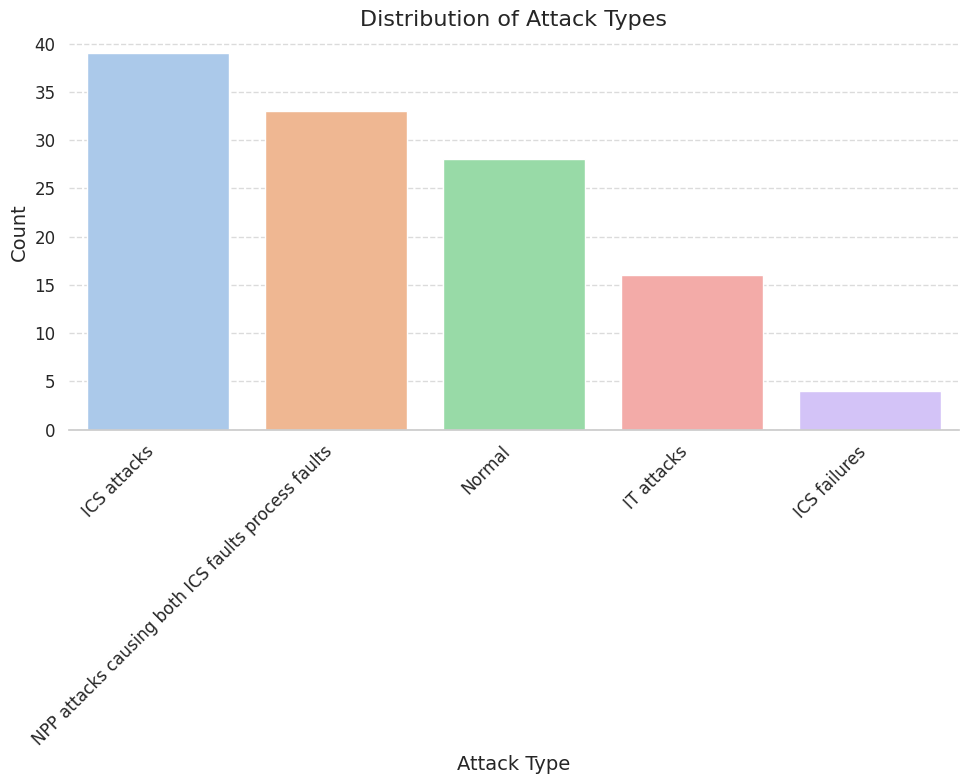

In [322]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(style="whitegrid", palette="pastel")

# Assuming 'final_data' is your DataFrame containing the 'Attack_Type' column

# Get value counts of 'Attack_Type' and sort by count in descending order
attack_type_counts = final_data['Attack_Type'].value_counts()
sorted_attack_types = attack_type_counts.index.tolist()

# Count plot for Attack_Type with customized aesthetics and sorted order
plt.figure(figsize=(10, 8))
ax = sns.countplot(data=final_data, x='Attack_Type', order=sorted_attack_types)

# Customizing plot aesthetics
ax.set_title('Distribution of Attack Types', fontsize=16)
ax.set_xlabel('Attack Type', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Adding grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adding plot borders
sns.despine(left=True)

plt.tight_layout()
output_path = '/kaggle/working/Distribution_of_attacks1.png'
plt.savefig(output_path, bbox_inches='tight')
plt.show()


In [323]:
df1 = pd.read_csv("/kaggle/input/final-data-result-actual2/final_data_result_actual.csv", encoding='ISO-8859-1')
df1.head()

,Minute,Second,Network_output,PLC_output,Process_output,Network_Probability_0,Network_Probability_1,PLC_Probability_0,PLC_Probability_1,Process_Probability_0,Process_Probability_1,Attack_Type
0,31,0,1,0,0,0.302326,0.697674,1.0,0.0,1.0,0.0,IT attacks
1,31,1,1,0,0,0.341463,0.658537,1.0,0.0,1.0,0.0,IT attacks
2,31,2,1,0,0,0.317073,0.682927,1.0,0.0,1.0,0.0,IT attacks
3,31,3,1,0,0,0.469388,0.530612,1.0,0.0,1.0,0.0,IT attacks
4,31,4,1,0,0,0.333333,0.666667,1.0,0.0,1.0,0.0,IT attacks


In [324]:
# Rename columns
df1 = df1.rename(columns={'Network_output': 'Network_output_actual', 'PLC_output': 'PLC_output_actual','Process_output': 'Process_output_actual','Attack_Type': 'Attack_Type_actual'})
new_columns = ['Minute','Second','Network_output_actual','PLC_output_actual','Process_output_actual','Attack_Type_actual']
df1 = df1[new_columns]
df1

,Minute,Second,Network_output_actual,PLC_output_actual,Process_output_actual,Attack_Type_actual
0,31,0,1,0,0,IT attacks
1,31,1,1,0,0,IT attacks
2,31,2,1,0,0,IT attacks
3,31,3,1,0,0,IT attacks
4,31,4,1,0,0,IT attacks
...,...,...,...,...,...,...
115,32,55,0,0,0,Normal
116,32,56,0,0,0,Normal
117,32,57,0,0,0,IT attacks
118,32,58,0,0,0,Normal


In [325]:
df2 = pd.read_csv("/kaggle/working/final_data_result.csv", encoding='ISO-8859-1')
df2.head()

,Minute,Second,Network_output,PLC_output,Process_output,Network_Probability_0,Network_Probability_1,PLC_Probability_0,PLC_Probability_1,Process_Probability_0,Process_Probability_1,Attack_Type
0,31,0,1,0,0,0.302326,0.697674,0.926174,0.073826,1.0,0.0,IT attacks
1,31,1,1,0,0,0.341463,0.658537,0.929078,0.070922,1.0,0.0,IT attacks
2,31,2,1,0,0,0.317073,0.682927,0.946667,0.053333,1.0,0.0,IT attacks
3,31,3,1,0,0,0.469388,0.530612,0.910345,0.089655,1.0,0.0,IT attacks
4,31,4,1,0,0,0.333333,0.666667,0.889655,0.110345,1.0,0.0,IT attacks


In [326]:
new_columns2 = ['Network_output','PLC_output','Process_output','Attack_Type']
df2 = df2[new_columns2]
df2

,Network_output,PLC_output,Process_output,Attack_Type
0,1,0,0,IT attacks
1,1,0,0,IT attacks
2,1,0,0,IT attacks
3,1,0,0,IT attacks
4,1,0,0,IT attacks
...,...,...,...,...
115,0,0,0,Normal
116,0,0,0,Normal
117,0,0,0,Normal
118,0,0,0,Normal


In [327]:
# Concatenate the predictions DataFrame with your new dataset
result_df = pd.concat([df1, df2], axis=1)
result_df

,Minute,Second,Network_output_actual,PLC_output_actual,Process_output_actual,Attack_Type_actual,Network_output,PLC_output,Process_output,Attack_Type
0,31,0,1,0,0,IT attacks,1,0,0,IT attacks
1,31,1,1,0,0,IT attacks,1,0,0,IT attacks
2,31,2,1,0,0,IT attacks,1,0,0,IT attacks
3,31,3,1,0,0,IT attacks,1,0,0,IT attacks
4,31,4,1,0,0,IT attacks,1,0,0,IT attacks
...,...,...,...,...,...,...,...,...,...,...
115,32,55,0,0,0,Normal,0,0,0,Normal
116,32,56,0,0,0,Normal,0,0,0,Normal
117,32,57,0,0,0,IT attacks,0,0,0,Normal
118,32,58,0,0,0,Normal,0,0,0,Normal


In [328]:
final_data = result_df

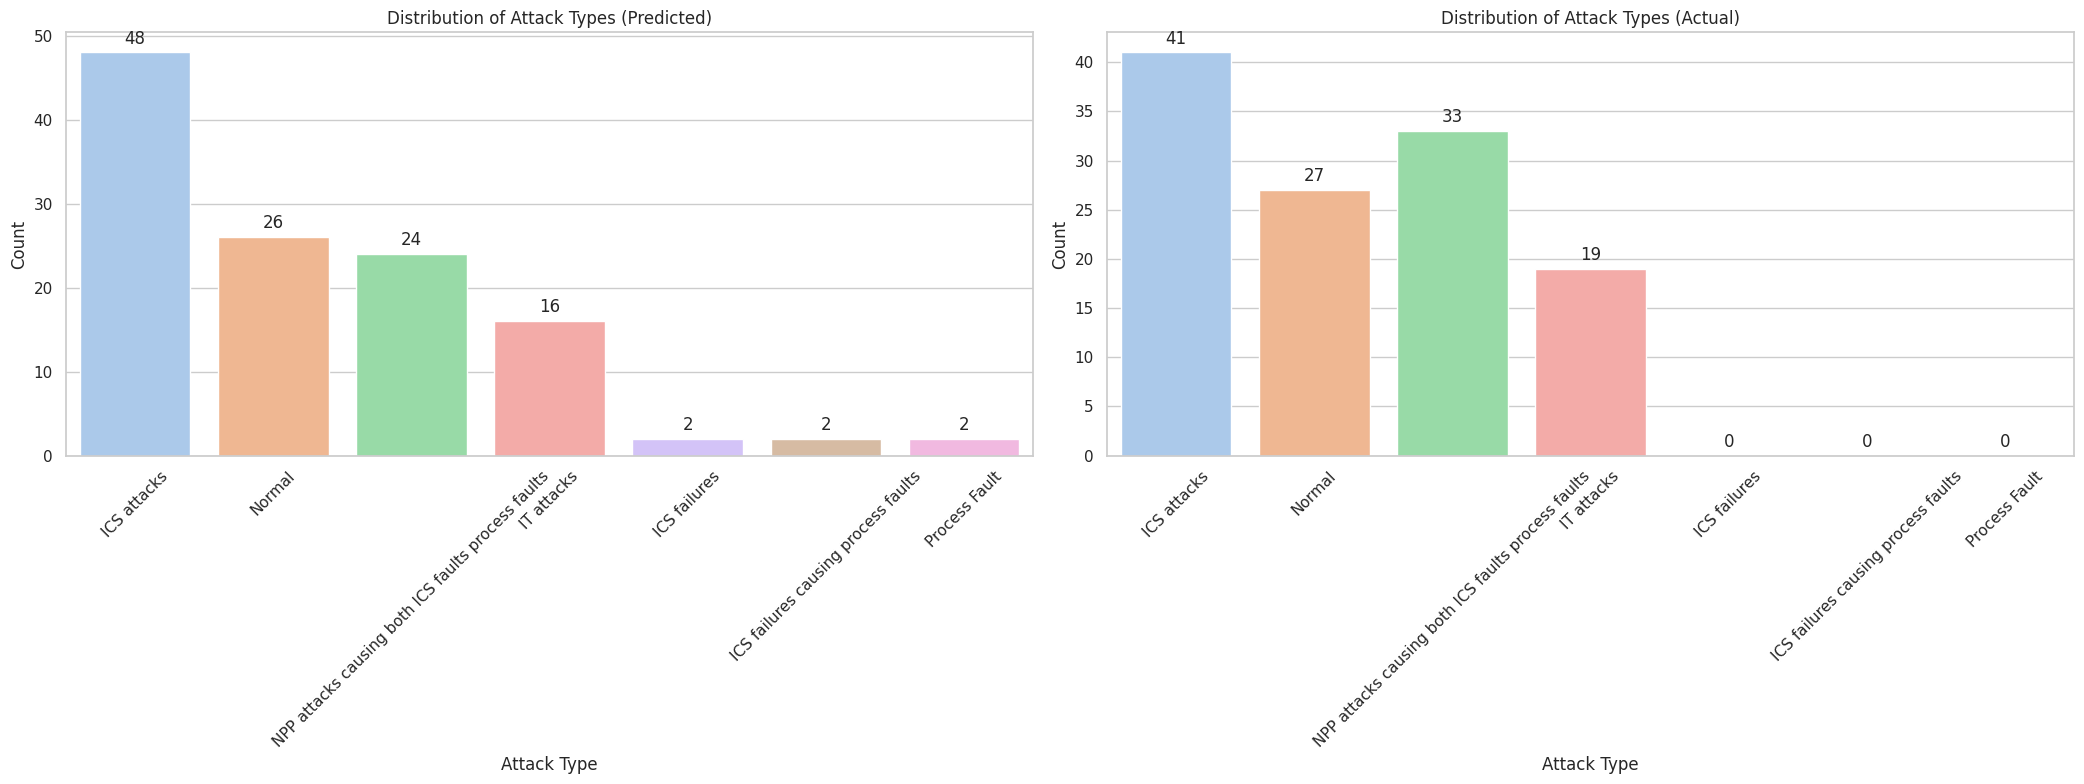

In [329]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(style="whitegrid", palette="pastel")

# Assuming 'final_data' is your DataFrame containing the 'Attack_Type' and 'Attack_Type_actual' columns

# Get value counts of 'Attack_Type' and sort by count in descending order
attack_type_counts = final_data['Attack_Type'].value_counts()
sorted_attack_types = attack_type_counts.index.tolist()

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(21, 8))

# Plot for 'Attack_Type'
sns.countplot(data=final_data, x='Attack_Type', order=sorted_attack_types, ax=axes[0])
axes[0].set_title('Distribution of Attack Types (Predicted)')
axes[0].set_xlabel('Attack Type')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)  # Remove 'ha' parameter

# Annotate each bar with its count for 'Attack_Type'
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Plot for 'Attack_Type_actual'
sns.countplot(data=final_data, x='Attack_Type_actual', order=sorted_attack_types, ax=axes[1])
axes[1].set_title('Distribution of Attack Types (Actual)')
axes[1].set_xlabel('Attack Type')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)  # Remove 'ha' parameter

# Annotate each bar with its count for 'Attack_Type_actual'
for p in axes[1].patches:
    axes[1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adjust layout
plt.tight_layout()

# Save the combined plot
output_path = '/kaggle/working/Distribution_of_attacks_combined1.png'
plt.savefig(output_path, bbox_inches='tight')

# Show the combined plot
plt.show()


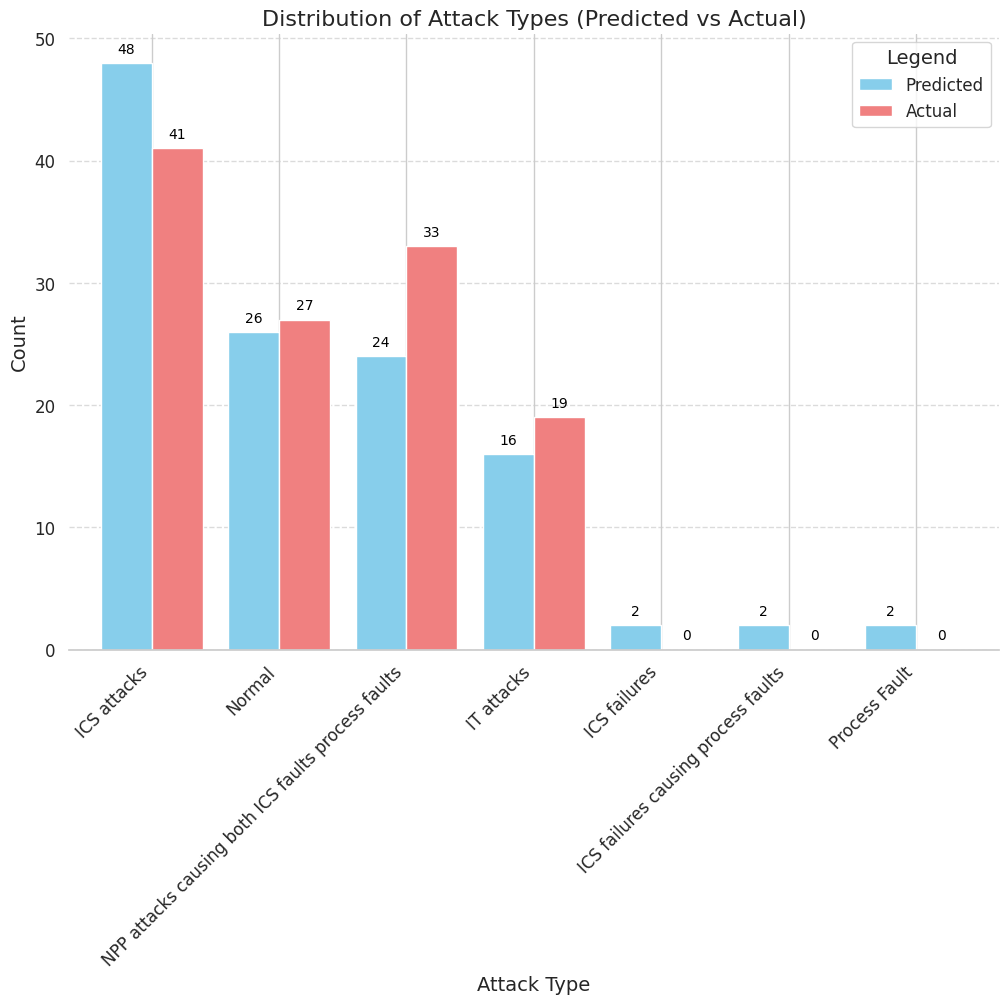

In [330]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(style="whitegrid", palette="pastel")

# Assuming 'final_data' is your DataFrame containing the 'Attack_Type' and 'Attack_Type_actual' columns

# Get value counts of 'Attack_Type' and 'Attack_Type_actual' and sort by count in descending order
attack_type_counts_pred = final_data['Attack_Type'].value_counts()
attack_type_counts_actual = final_data['Attack_Type_actual'].value_counts()

# Concatenate the two Series for plotting
combined_counts = pd.concat([attack_type_counts_pred, attack_type_counts_actual], axis=1, keys=['Predicted', 'Actual'])

# Plotting the bar chart
ax = combined_counts.plot(kind='bar', figsize=(12, 8), width=0.8, color=['skyblue', 'lightcoral'])

# Customizing plot aesthetics
ax.set_title('Distribution of Attack Types (Predicted vs Actual)', fontsize=16)
ax.set_xlabel('Attack Type', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Adding legend
plt.legend(title='Legend', title_fontsize='14', fontsize='12')

# Adding numbers on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

# Adding grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adding plot borders
sns.despine(left=True)

# Save the combined plot
output_path = '/kaggle/working/Distribution_of_attacks_combined.png'
plt.savefig(output_path, bbox_inches='tight')

# Show the combined plot
plt.show()


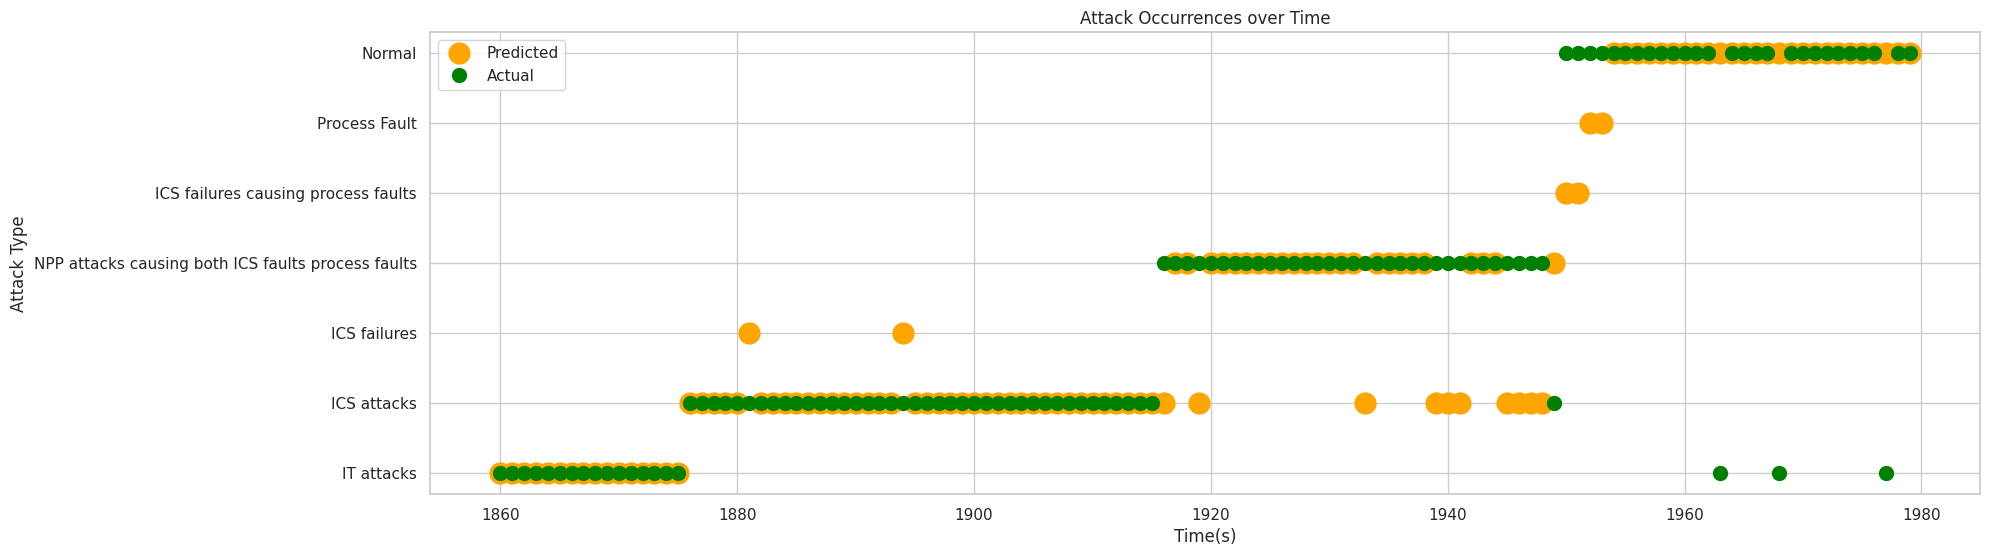

In [331]:
import seaborn as sns
import matplotlib.pyplot as plt



# Create a new figure for attack occurrences over time
plt.figure(figsize=(20, 6))

# Convert 'Minute' and 'Second' to a time representation for plotting
final_data['Time'] = final_data['Minute'] * 60 + final_data['Second']

# Filter data to get attack times
attack_data = final_data[final_data['Attack_Type'].isin(['ICS attacks',
'ICS failures',
'ICS failures causing process faults',
'IT attacks',
'Normal',
'NPP attacks causing both ICS faults process faults',
'Process Fault'])]  # Adjust based on your actual attack types

# Plotting the attack occurrences
plt.plot(final_data['Time'], final_data['Attack_Type'], marker='o', markersize=15,linestyle='', label='Predicted', color='orange')
plt.plot(final_data['Time'], final_data['Attack_Type_actual'], marker='o',markersize=10, linestyle='', label='Actual', color='green')  # Adjust color and label


# Customize the plot
plt.xlabel('Time(s)')
plt.ylabel('Attack Type')
plt.title('Attack Occurrences over Time')
plt.yticks(final_data['Attack_Type'].unique())  # Set the y-axis ticks based on unique attack types

# Show legend
plt.legend()
output_path_occurrences = '/kaggle/working/Attack_Occurrences_over_Time2.png'
plt.savefig(output_path_occurrences, bbox_inches='tight')

# Show the second plot
plt.show()
